# Cardiovascular Diseases Prediction

According to statistics by Singapore Heart Foundation, almost 1 in 3 deaths is due to heart disease or stroke. Cardiovascular diseases are also the top disease burden in Singapore, responsible for almost 20% of the total disease and injury burden.

What are cardiovascular diseases?
Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels. They include:
- Coronary heart disease – a disease of the blood vessels supplying the heart muscle;
- Cerebrovascular disease – a disease of the blood vessels supplying the brain;
- Peripheral arterial disease – a disease of blood vessels supplying the arms and legs;
- Rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria;
- Congenital heart disease – birth defects that affect the normal development and functioning of the heart caused by malformations of the heart structure from birth; and
- Deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.

The Cardiovascular Diseases Dataset on Kaggle will be used for the classification of the persence or absence of CVDs. 


# The Cardiovascular Diseases Dataset

Data description:
- Objective: Factual information
- Examination: Results of medical examination
-  Subjective: Information given by the patient

Features:
- age : Age | Objective Feature | age | int (days) |
- gender : Gender | Objective Feature | gender | 1: women, 2: men |
- height : Height | Objective Feature | height | int (cm) |
- weight : Weight | Objective Feature | weight | float (kg) |
- ap_hi : Systolic blood pressure | Examination Feature | ap_hi | int |
- ap_lo : Diastolic blood pressure | Examination Feature | ap_lo | int |
- cholesterol : Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- gluc : Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- smoke : Smoking | Subjective Feature | smoke | binary |
- alco : Alcohol intake | Subjective Feature | alco | binary |
- active : Physical activity | Subjective Feature | active | binary |
- cardio : Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# 1. Import libraries required
Importing essential libriaries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import os
import pandas_profiling as pp
sb.set() # set the default Seaborn style for graphics
sb.set_style("darkgrid")
sb.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})


# 2. Checking of Data 
Read the data .csv file and put it in a dataframe

In [2]:
# Import the data
cardio = pd.read_csv('cardio_train.csv', sep=';')

# Take a look at first 10 data points from the dataset 
cardio.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


This shows the data type and the number of datapoints in the raw data. There are 70,000 datasets which is a good range for this Machine Learning project.

In [3]:
print("Data type : ", type(cardio))
print("Data dims : ", cardio.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 13)


The info() method displays information about a DataFrame including the index data type, coloumns, non zero values and memory usage.
There are no missing values in this dataset, there is no need for handling data loss.

In [4]:
# Basic information about the dataset
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 3. Processing Data 
By making a copy of the dataset test could test out if our process is helpful for training model. 

In [6]:
cardio_data = cardio.copy()

The 'id' coloumn is not a useful attribution which we can use in our Machine Learning model. Thus, it is removed. 


The raw data gave age in terms of days, we converted it to years.

We also did a combination of height and weight into Body Mass Index (BMI). 
Note: BMI is a crucial factor given one's height and weight. It measures an individual's body fatness and helps to screen for weight categories that may lead to health problems. 

In [7]:
# Drop id column as it doesnt help 
cardio_data = cardio_data.drop(columns='id')

# Convert age into years taking into account of 29 days of February in every 4 years
cardio_data['age'] = cardio_data['age']//365.25

# Combine height & weight into BMI
cardio_data['bmi'] = cardio_data["weight"] / (cardio_data["height"]/100)**2
cardio_data = cardio_data.drop(columns=['weight', 'height'])

In [8]:
# The values after the conversion
cardio_data.head(10)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,140,90,3,1,0,0,1,1,34.927679
2,51.0,1,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,150,100,1,1,0,0,1,1,28.710479
4,47.0,1,100,60,1,1,0,0,0,0,23.011177
5,59.0,1,120,80,2,2,0,0,0,0,29.384676
6,60.0,1,130,80,3,1,0,0,1,0,37.729725
7,61.0,2,130,90,3,3,0,0,1,1,29.983588
8,48.0,1,110,70,1,1,0,0,1,0,28.440955
9,54.0,1,110,60,1,1,0,0,0,0,25.282570


In [9]:
# Summary of the statistics
cardio_data.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.803257,1.349571,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.762462,0.476838,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.000000,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


There are 5 numerical attributes which is age, height, weight, ap_hi, ap_lo and 6 categorical attributes which is gender, cholesterol, gluc, smoke, alco, active. 

However, the pandas .info() method interpreted all attributes as numerical type.
Therefore, we have to convert each of these categorical variables into “category” data type.

In [10]:
# Convert categorical variables into “category” data type
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create a list that contains numerical attributes
num_attribs = ['age', 'bmi', 'ap_hi', 'ap_lo']

# Covert the data type of categorical attributes into "category"
for cat_attrib in cat_attribs:                                # iterate over each categorical attribute
  cardio_data[cat_attrib] = cardio_data[cat_attrib].astype('category')  # convert data type

cardio_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.803257,6.762462,29.000000,48.000000,53.000000,58.000000,64.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
bmi,70000.0,27.556513,6.091511,3.471784,23.875115,26.374068,30.222222,298.666667


# 3.1 Remove unrealistic values

From the previous table we could see that there are unrealistic values:
lowest ap_hi = -150 
lowest ap_low = -70 
highest ap_hi = 16020 
highest ap_lo = 11000

From our research, Systolic blood pressure (ap_hi) is bounded between 90 and 220mmHg while diastolic pressure (ap_low) is bounded between 60 to 120mmHg.

Therefor, we will have to remove the outliers that are outside the range.


The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg


C:\Users\User\AppData\Local\Temp\ipykernel_22512\3408700643.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cardio_data = cardio_data[~filter_min]


<AxesSubplot:xlabel='ap_lo'>

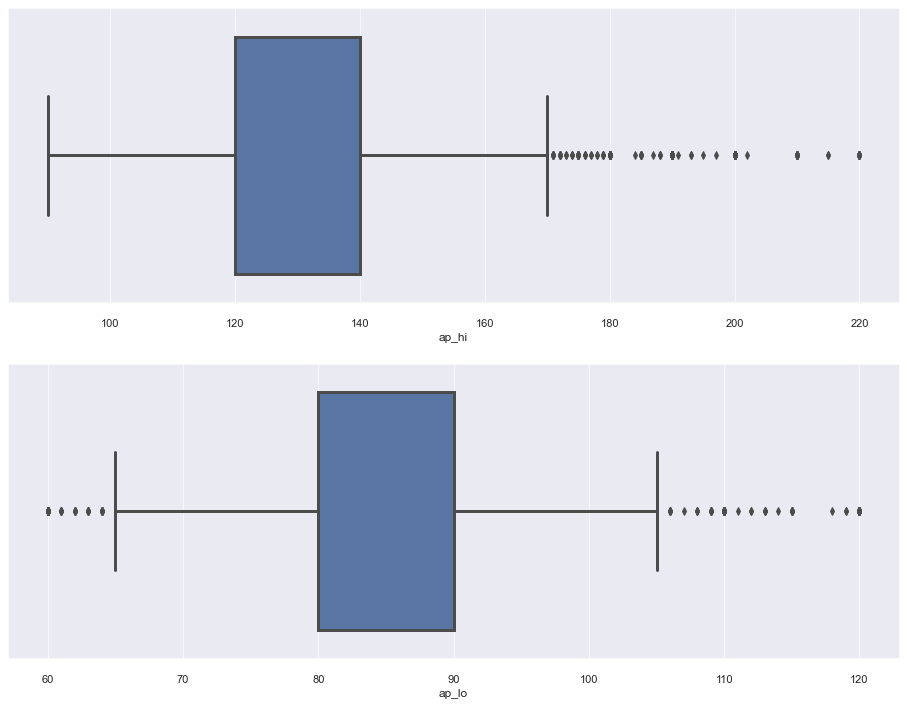

In [11]:
# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure
ap_hi = cardio_data['ap_hi']
ap_lo = cardio_data['ap_lo']

# Print number of unusual training examples
print("The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg")
cardio_data['cardio'].loc[(ap_hi < 90) | (ap_hi > 220) | (ap_lo < 60) | (ap_lo > 120)].count()

#filter out bad data
filter_max = ((cardio_data["ap_hi"]>220) | (cardio_data["ap_lo"]>120))
filter_min = ((cardio_data["ap_hi"]<90) | (cardio_data["ap_lo"]<60))
cardio_data = cardio_data[~filter_max]
cardio_data = cardio_data[~filter_min]
len(cardio_data)

fig, axs = plt.subplots(2, figsize=(16, 12))
sb.boxplot(data=cardio_data, x='ap_hi', ax=axs[0], orient='h')
sb.boxplot(data=cardio_data, x='ap_lo', ax=axs[1], orient='h')

# 4. Visualization

   # 4.1 Boxplot 
for all the different variables
(Already inside the univariate analysis)

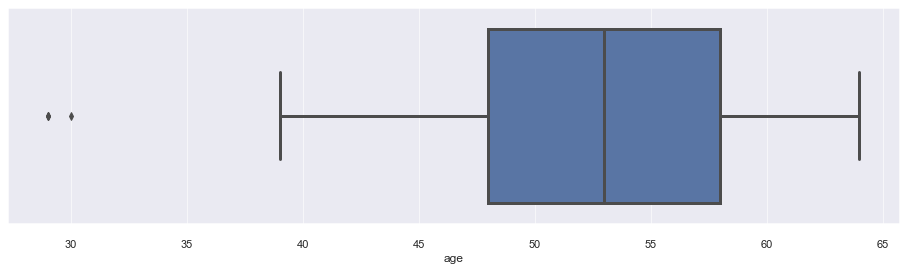

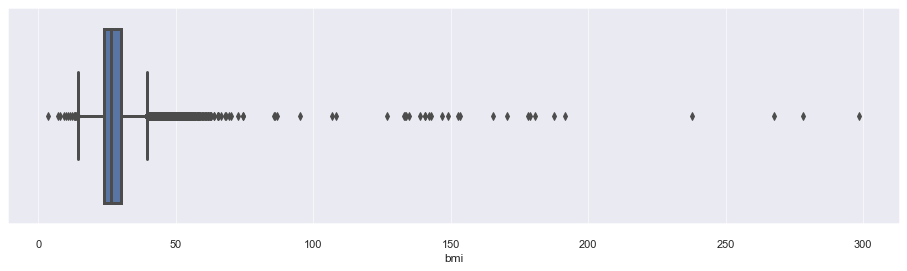

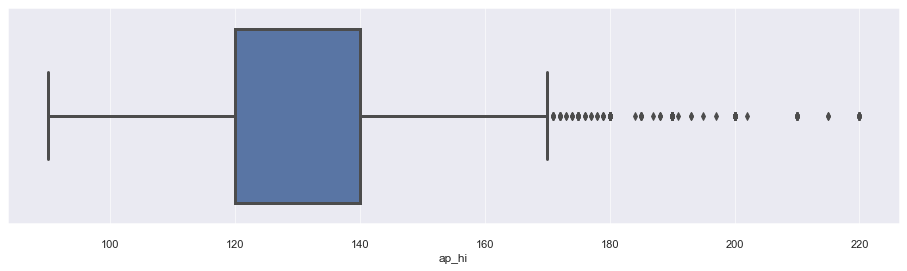

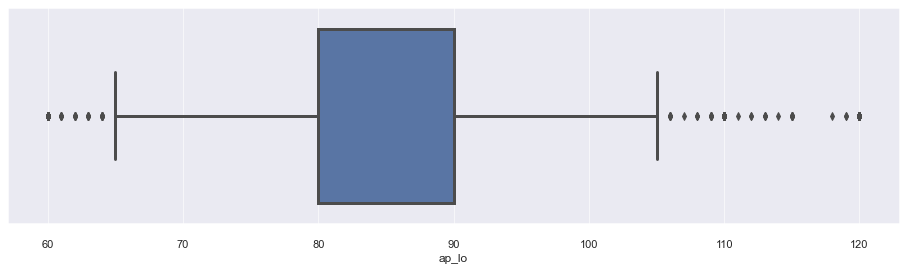

In [12]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(cardio_data[num_attribs])

# Boxplot of the numeric data
for var in numeric_data:                                      # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))  # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=var, orient='h')                  # box plot

### Removing outlier
After our presentation we realised that we should have removed the outliers as it affects the results for adaboost.
From our research, we found out that the possible BMI value should be in the range of 19 to 35. 

In [13]:
# Extract feature bmi from the dataset
bmi = cardio_data['bmi']

# Drop outliers
cardio_data = cardio_data.drop(cardio_data.loc[(bmi < 19) | (bmi > 35)].index)



We also removed the outliers for ap_hi and ap_lo 

In [14]:
# Extract feature bmi from the dataset
aphi = cardio_data['ap_hi']

# Drop outliers
cardio_data = cardio_data.drop(cardio_data.loc[(aphi < 90) | (aphi > 170)].index)

# Extract feature bmi from the dataset
aplo = cardio_data['ap_lo']

# Drop outliers
cardio_data = cardio_data.drop(cardio_data.loc[(aplo < 65) | (aplo > 105)].index)

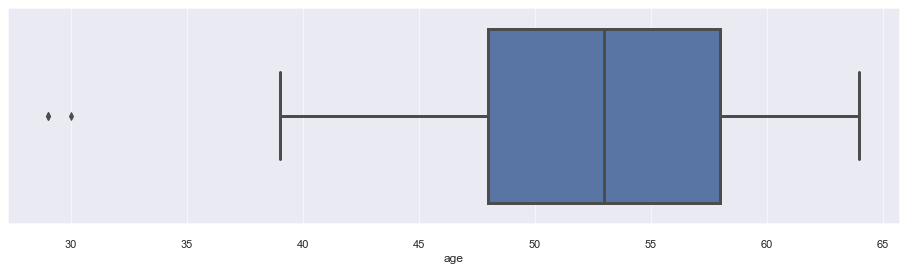

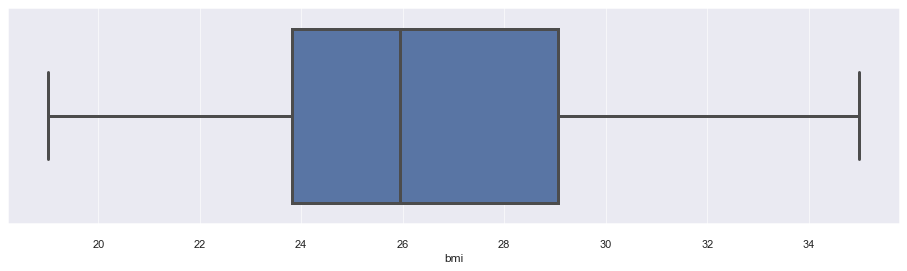

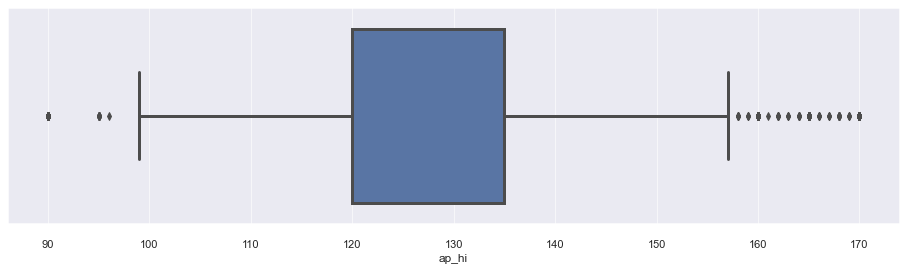

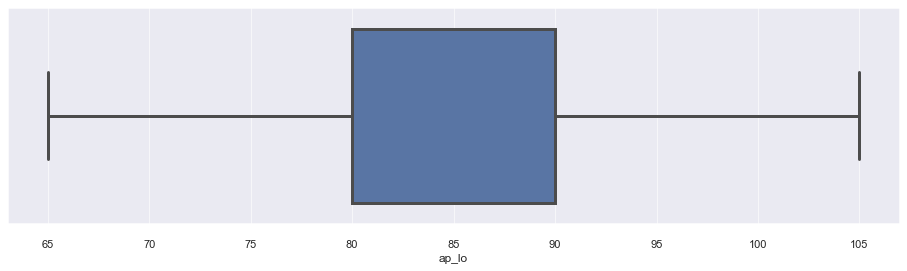

In [15]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(cardio_data[num_attribs])

# Boxplot of the numeric data
for var in numeric_data:                                      # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))  # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=var, orient='h')                  # box plot

Our team used Pandas Profiling as our new approach for this project.
It allows us to have a very detailed report on the pandas dataframe.

*INSTALL PANDAS_PROFILING ON COMPUTER BEFORE USING THIS TECHNIQUE

1 command to get a full overview of the data set. Enables us to find any possible warnings that will affect our results. 

In [16]:
pp.ProfileReport(cardio_data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 # 4.2 Univariate Analysis

Visualize the summary of uni-variate distributions of each numerical attribute using boxplot, hisplot and violinplot

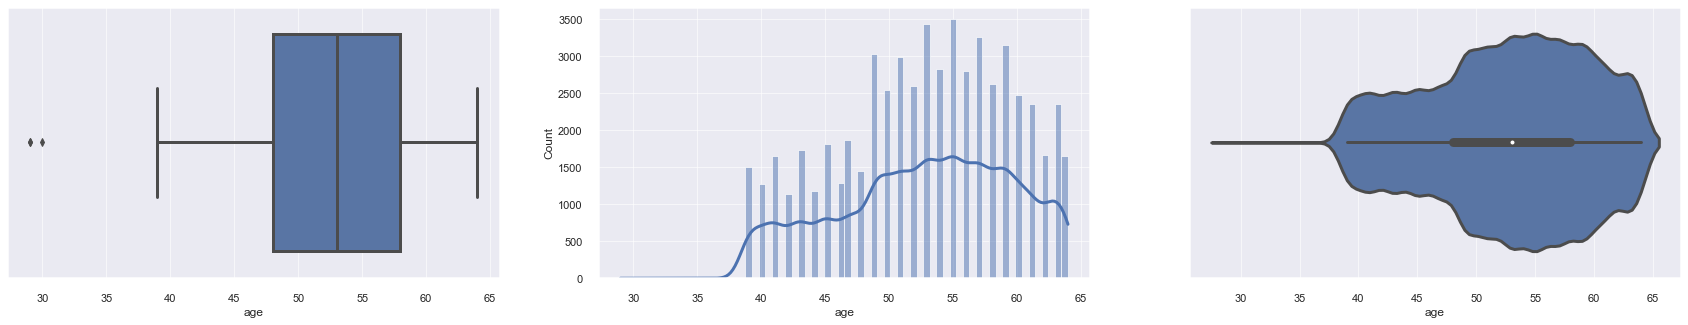

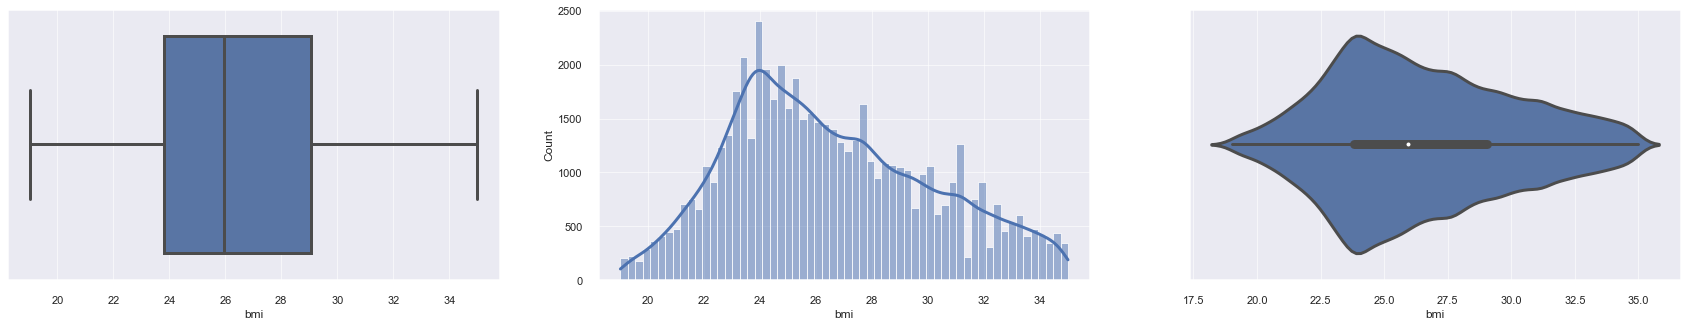

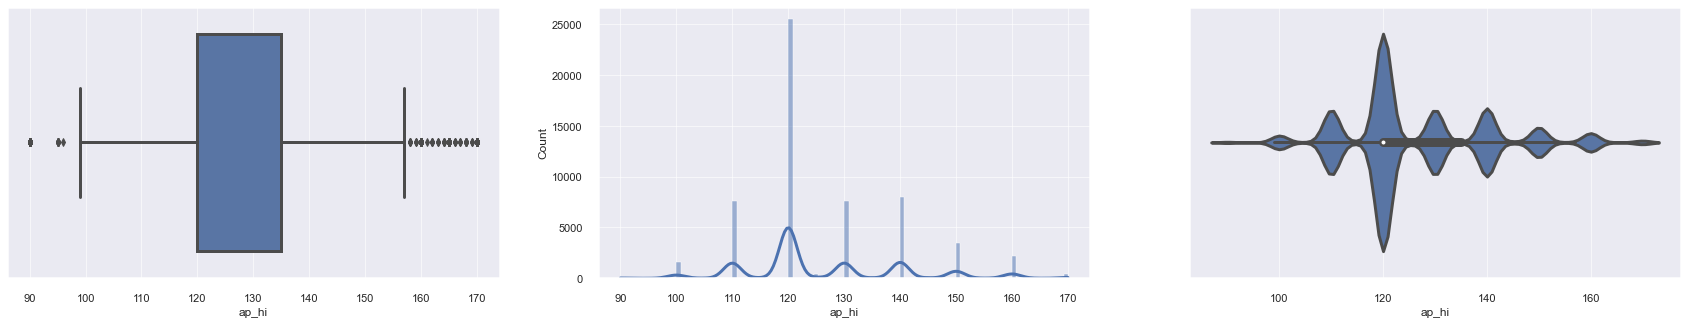

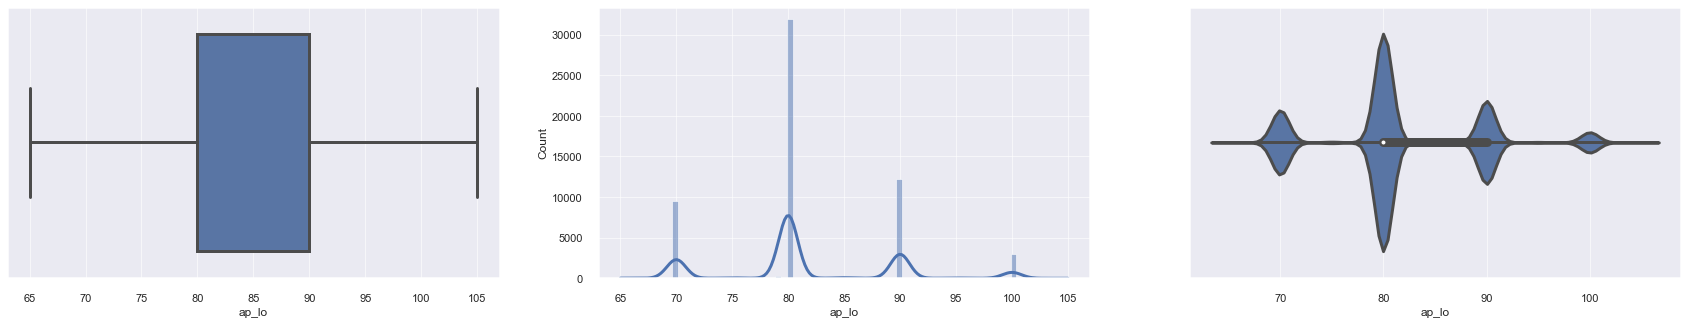

In [17]:
# Univariate analysis
for num_attrib in num_attribs:                                     # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))       # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=num_attrib, orient='h', ax=axes[0])    # box plot
  sb.histplot(data=cardio_data[num_attrib], kde=True, ax=axes[1])       # histogram with Kernel Density Estimators (KDE)
  sb.violinplot(data=cardio_data, x=num_attrib, orient='h', ax=axes[2]) # violin plot

The majority of patients whose information was provided in the dataset are:

- Between the ages of 39 and 64 years old
- Between a BMI range of 23 to 30 



# 4.5 Bivariate Analysis
Lets look at some numerical attributes

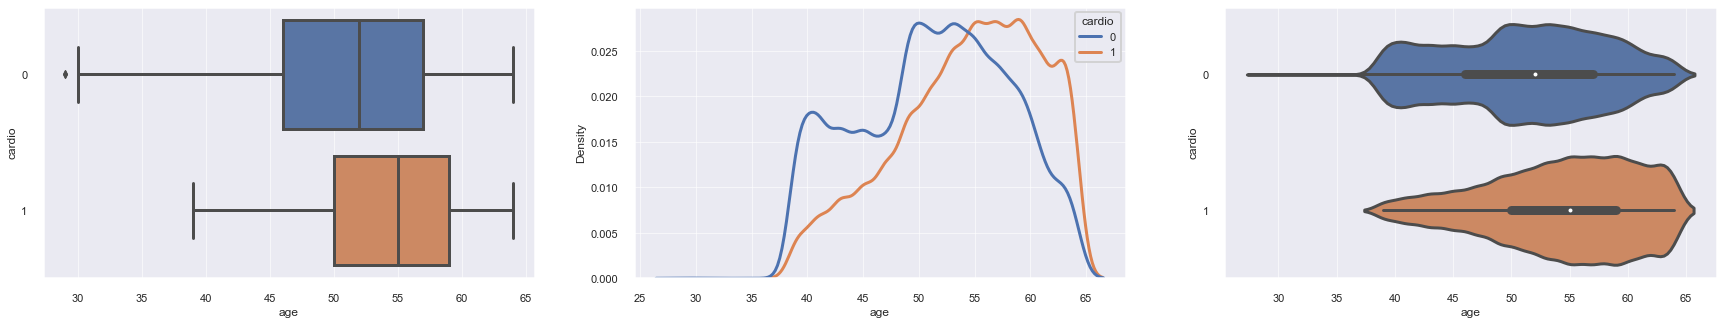

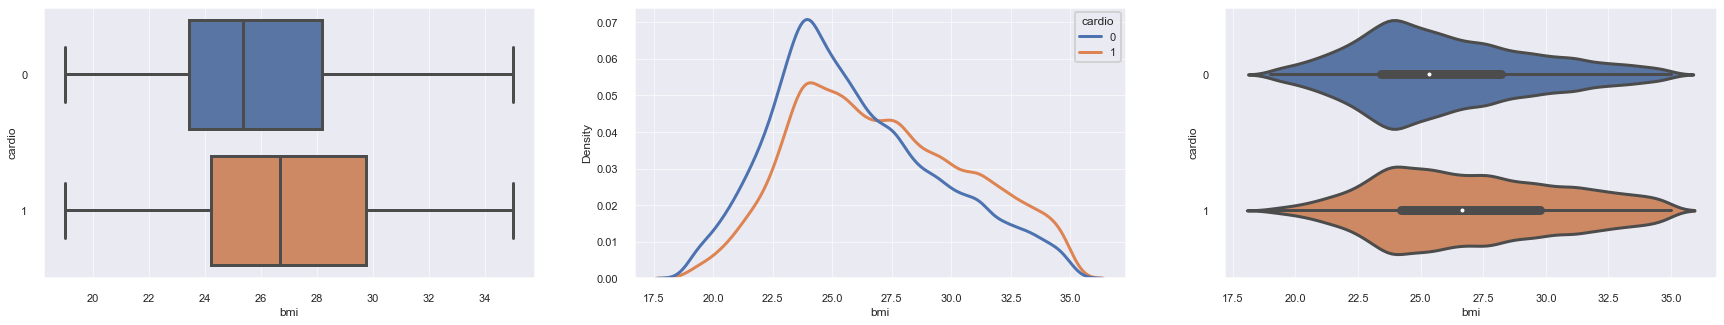

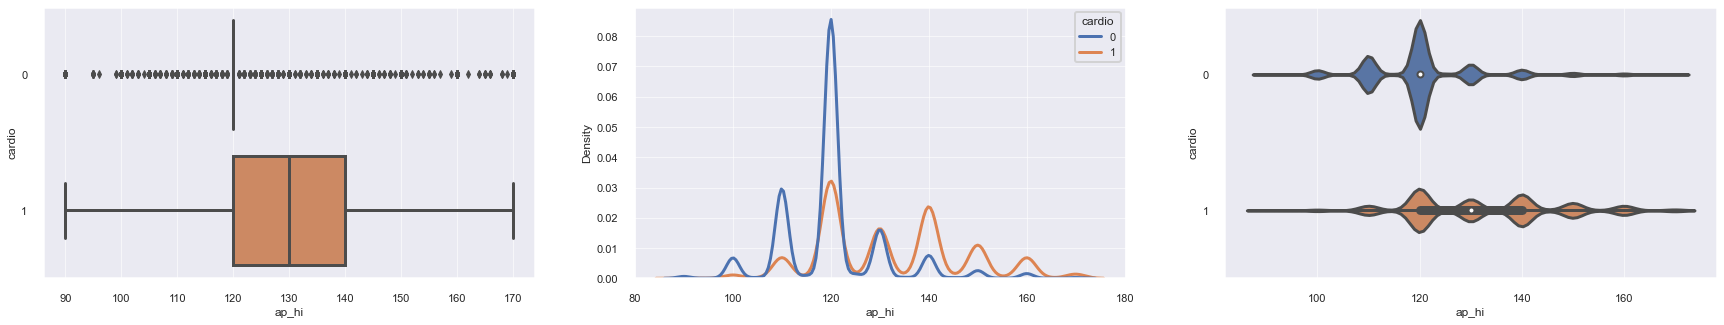

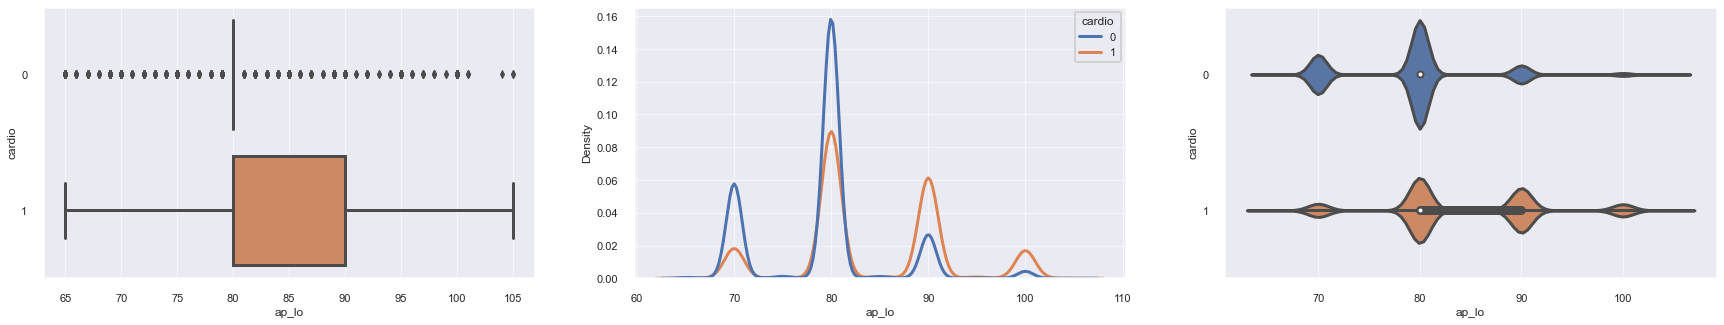

In [18]:
# Bivariate analysis with respect to target class
for num_attrib in num_attribs:                                                           # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))                             # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=num_attrib, y='cardio', orient='horizontal', ax=axes[0])     # box plot
  sb.kdeplot(data=cardio_data, x=num_attrib, hue='cardio', ax=axes[1])                        # kde plot
  sb.violinplot(data=cardio_data, x=num_attrib, y='cardio', orient='horizontal', ax=axes[2])  # violin plot

From the graphs above, it can be seen that age, systolic blood pressure(ap_hi), diastolic blood pressure(ap_low) has a noticable difference between those who have CVD and those who does not. Wehreases, BMI has almost overlapping distributions. 

This means that age, systolic blood pressure(ap_hi), diastolic blood pressure(ap_low) might be a good factor to distinguish between CVD and non-CVD patients while BMI is not important in predicting this target class.


# 5. Exploratory Analysis
Since ystolic blood pressure(ap_hi), diastolic blood pressure(ap_low) is a significant factor in determining the CVD in patients. We tried to categorize the blood pressure to get a better understanding of the data.

#  5.1 Categorize Blood Pressure
Assign the 5 stages of the blood pressure category for the corresponding range from 1 to 5:

1. Normal 
2. Elevated
3. High blood pressure (hypertension) Stage 1 
4. High blood pressure (hypertension) Stage 2
5. Hypertensive crisis (consult your doctor immediately)

In [19]:
cardio1_data = cardio_data.copy() # Made an copy of the originial data for easy reference
cardio1_data.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58131 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          58131 non-null  float64 
 1   gender       58131 non-null  category
 2   ap_hi        58131 non-null  int64   
 3   ap_lo        58131 non-null  int64   
 4   cholesterol  58131 non-null  category
 5   gluc         58131 non-null  category
 6   smoke        58131 non-null  category
 7   alco         58131 non-null  category
 8   active       58131 non-null  category
 9   cardio       58131 non-null  category
 10  bmi          58131 non-null  float64 
dtypes: category(7), float64(2), int64(2)
memory usage: 4.6 MB


In [20]:
# Rank Systolic blood pressure
cardio1_data.loc[ap_hi < 120, 'ap_hi'] = 1
cardio1_data.loc[(ap_hi >= 120) & (ap_hi < 130), 'ap_hi'] = 2
cardio1_data.loc[(ap_hi >= 130) & (ap_hi < 140), 'ap_hi'] = 3
cardio1_data.loc[(ap_hi >= 140) & (ap_hi <= 180), 'ap_hi'] = 4
cardio1_data.loc[ap_hi > 180, 'ap_hi'] = 5

# Rank Diastolic blood pressure
cardio1_data.loc[ap_lo < 80, 'ap_lo'] = 1
cardio1_data.loc[(ap_lo >= 80) & (ap_lo < 90), 'ap_lo'] = 3
cardio1_data.loc[(ap_lo >= 90) & (ap_lo <= 120), 'ap_lo'] = 4
cardio1_data.loc[ap_lo > 120, 'ap_lo'] = 5

The ranked blood pressure (bp) will be a new column, 'ap_hi' and 'ap_lo' will be dropped.

In [21]:
# Rank blood pressure and append it to the dataframe
bp = pd.DataFrame(cardio1_data[['ap_hi', 'ap_lo']])
cardio1_data['bp'] = bp.max(axis=1).astype('category')

# Drop ap_hi, ap_lo columns and id 
cardio1_data = cardio1_data.drop(columns=['ap_hi', 'ap_lo'])

# Update categorical and numerical attributes
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio']
num_attribs = ['age', 'bmi']

In [22]:
cardio1_data.info()
cardio1_data.head(10)
# Checking how the data looks like after categorization

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58131 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          58131 non-null  float64 
 1   gender       58131 non-null  category
 2   cholesterol  58131 non-null  category
 3   gluc         58131 non-null  category
 4   smoke        58131 non-null  category
 5   alco         58131 non-null  category
 6   active       58131 non-null  category
 7   cardio       58131 non-null  category
 8   bmi          58131 non-null  float64 
 9   bp           58131 non-null  category
dtypes: category(8), float64(2)
memory usage: 3.8 MB


,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp
0,50.0,2,1,1,0,0,1,0,21.967120,3
1,55.0,1,3,1,0,0,1,1,34.927679,4
2,51.0,1,3,1,0,0,0,1,23.507805,3
3,48.0,2,1,1,0,0,1,1,28.710479,4
5,59.0,1,2,2,0,0,0,0,29.384676,3
7,61.0,2,3,3,0,0,1,1,29.983588,4
8,48.0,1,1,1,0,0,1,0,28.440955,1
10,61.0,1,1,1,0,0,1,0,28.010224,3
11,51.0,2,1,1,0,0,1,0,20.047446,3
12,40.0,2,1,1,0,0,0,0,22.038567,3


# 6. Visualization Analysis
Since we have cleaned and categorized the data, next let us look at the graphs and analyze how each factor affect the presence of CVD.

# 6.1 Categotical Attributies
Use catplot to observe the correlations between categorical attributes and the target variable cardio. From the boxplot in section 5, we can see that blood pressure (bp) and age both is an important factor to determine the target class. Let us analyze blood pressure (bp) first. 

<AxesSubplot:xlabel='bp', ylabel='count'>

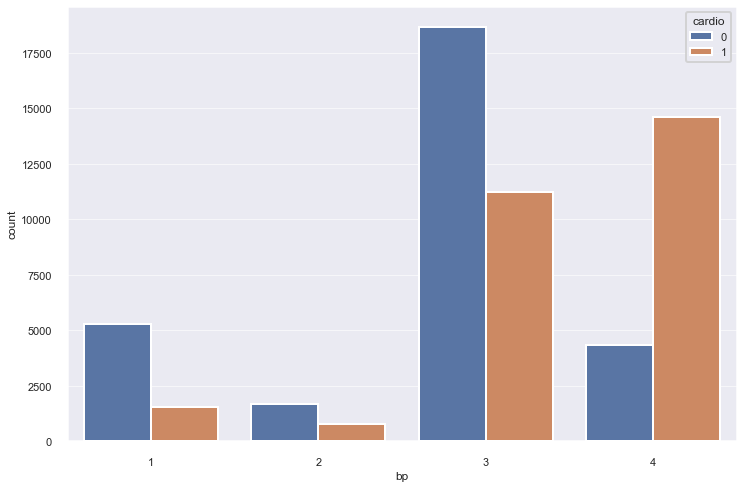

In [23]:
# Count plot of age over target class
fig = plt.subplots(figsize=(12,8))                     # setup the frame of the plot
sb.countplot(x='bp', hue='cardio', data=cardio1_data)  # count plot

From the graph above, we can see that patients with blood pressure (bp) of category 3 and 4 are more exposed to CVD which are the ones with high blood pressure stage 1 and 2. 

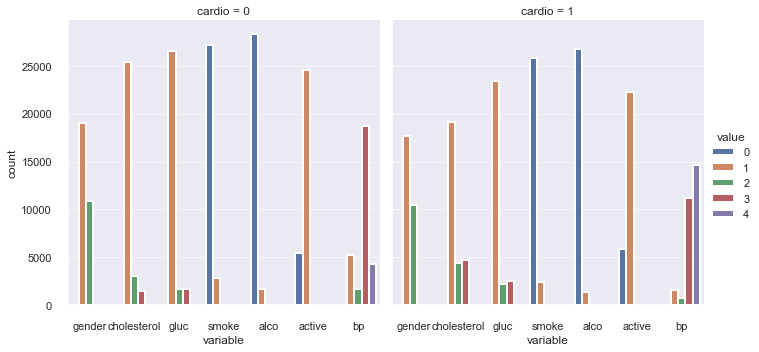

In [24]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio1_data, id_vars=['cardio'], value_vars=cat_attribs[:-1])       # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', col='cardio', data=cat_df, kind='count')  # categorical plot


It can be seen that patients with CVD have higher cholesterol, glucose and blood pressure level.

Let's take a look at how age spreads along the target class.

<AxesSubplot:xlabel='age', ylabel='count'>

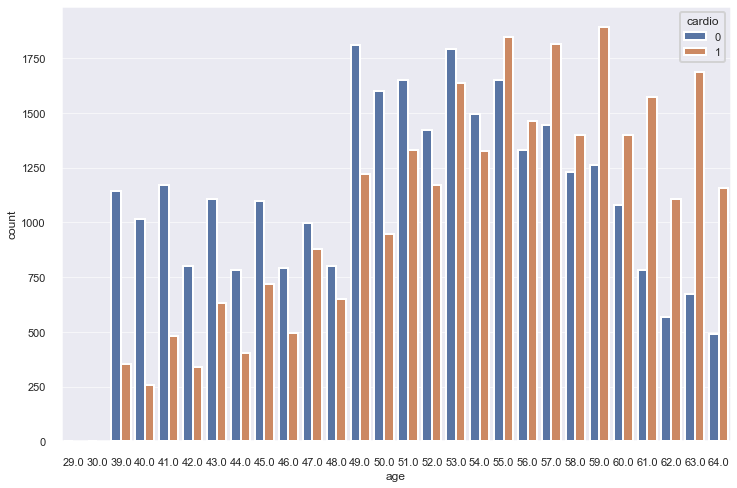

In [25]:
# Count plot of age over target class
fig = plt.subplots(figsize=(12,8))                     # setup the frame of the plot
sb.countplot(x='age', hue='cardio', data=cardio1_data)  # count plot

From the graph above, we can observe that after the age 55, patients are more exposed to CVD.

# 7. Correlation

<AxesSubplot:>

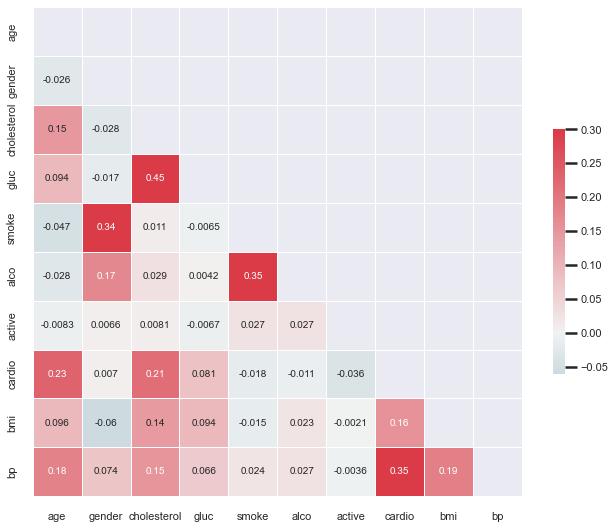

In [26]:
# Calculate the correlations between attributes
corr = cardio1_data.astype('float').corr()
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize=(11,9))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

From this table, it seems like blood pressure (bp) has the highest correlation to determine if the patient has or does not have CVD. This is followed by age, cholestrol and weight.

# 8. Heatmap
An alternative way of analysis is by doing heatmap as shown below.

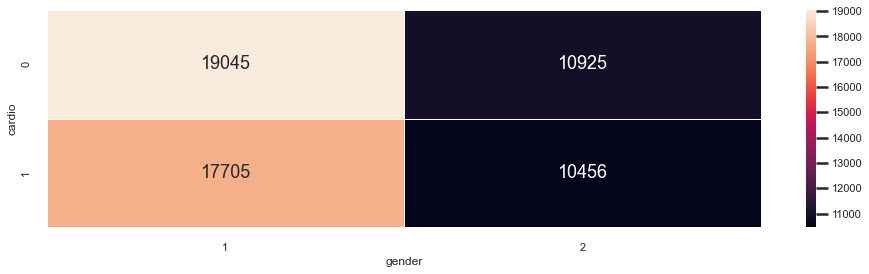

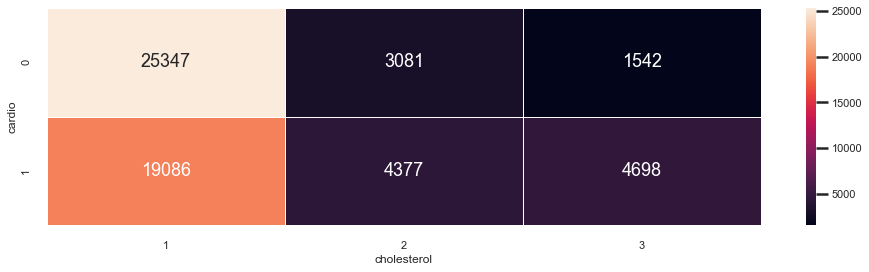

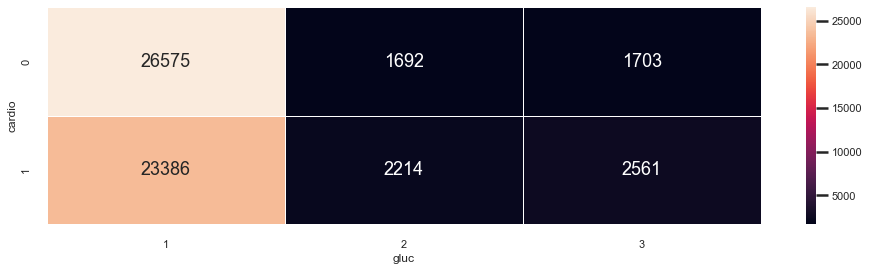

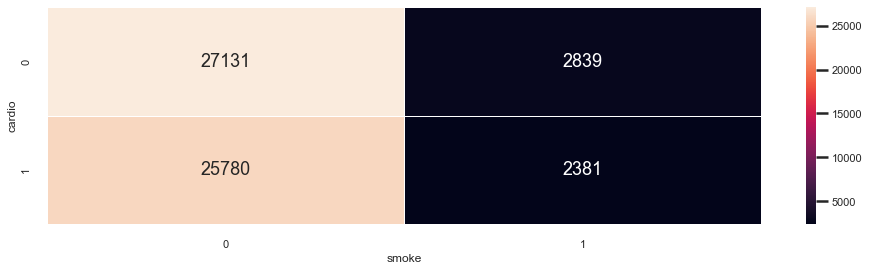

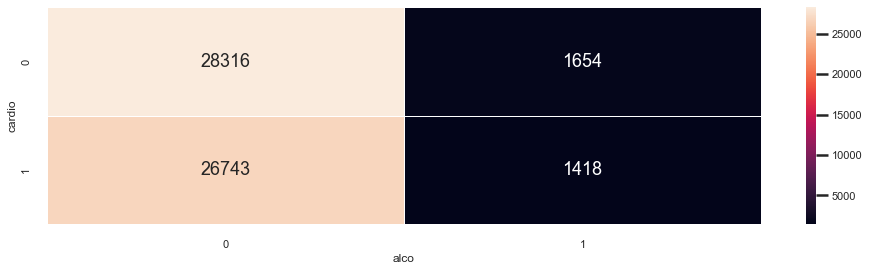

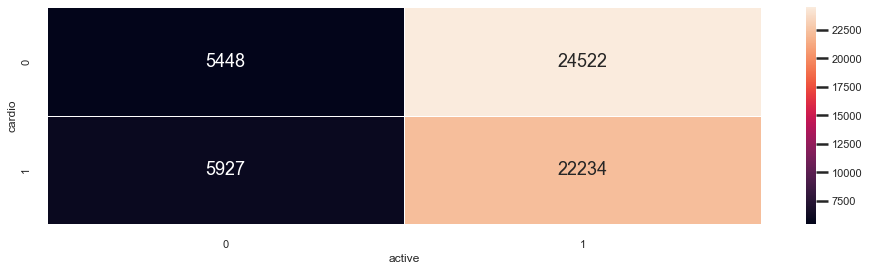

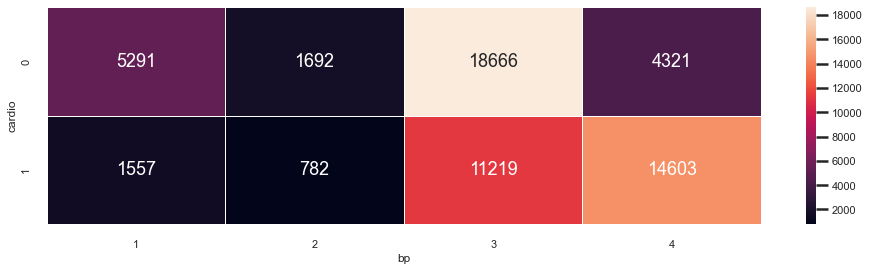

In [27]:
# The relationship between the presence and absence of CVDs and categorical attributes
for cat_attrib in cat_attribs[:-1]:                                       # iterate over categorical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))              # setup the frame of the plot
  sb.heatmap(cardio1_data.groupby(['cardio', cat_attrib]).size().unstack(),
             linewidths=1, annot=True, annot_kws={'size': 18}, fmt='.0f') # heat map

# 9 EDA Conclusion
The ratio of patients with CVD to those without is:

- Approximately 1/1 for both genders
- Slightly smaller than 1 among patients with normal cholesterol and/or glucose levels but noticable among patients with above and well above normal levels
- Approximately the same for both smokers and non-smokers
- Approximately the same for both patients who drink alcohol and who don't
- Approximately the same for both active and inactive patients
- Significant for each level of blood pressure:
   - Normal: 1/3
   - Elevated: 1/2
   - High blood pressure Stage 1: 2/3
   - High blood pressure Stage 2: 7/2
   - Hypertensive crisis: 5/1 

# 9.1 EDA Conclusion
From our data anlysis, we can see that blood pressure (bp) and age both are important factors to determine if the patients has CVD or not. Therefore, we are going to keep a set data for machine learning later on. One with age, glucose, cholesterol, ap_hi and ap_lo. 

After our data analysis, these are the following factors that we will keep for our machine learning in part 2 and 3: 
-Blood Pressure (ap_hi & ap_lo) 
-Cholesterol 
-Gluc 
-Age 
-Cardio

In [28]:
cardio_data.sample(10)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
61682,40.0,1,120,80,3,3,0,0,1,0,25.103878
42568,59.0,1,130,90,1,1,1,0,1,0,28.628792
9804,61.0,2,150,100,3,1,0,0,0,1,23.711845
57514,41.0,2,110,69,1,1,0,0,1,0,22.491349
7039,51.0,1,110,80,1,1,0,0,1,0,24.740937
57252,55.0,2,130,90,3,1,0,0,0,0,32.283058
6193,40.0,1,120,80,1,1,0,0,1,0,20.700817
47034,59.0,2,140,90,3,1,0,0,1,1,29.411765
19829,55.0,1,110,70,1,1,1,0,1,1,25.910684
18763,58.0,1,120,80,2,2,0,0,1,1,24.538965


In [29]:
# Remove the id column
cardio_data = cardio_data.drop(columns='gender')
cardio_data = cardio_data.drop(columns='smoke')
cardio_data = cardio_data.drop(columns='alco')
cardio_data = cardio_data.drop(columns='active')
cardio_data = cardio_data.drop(columns='bmi')

In [30]:
cardio_data.sample(10)

,age,ap_hi,ap_lo,cholesterol,gluc,cardio
67933,51.0,130,90,2,2,1
20971,62.0,140,90,3,1,1
63824,52.0,140,90,2,1,1
40941,39.0,90,70,1,1,0
58099,58.0,140,90,1,1,1
60248,48.0,120,90,1,1,0
21601,54.0,120,80,1,1,0
67084,58.0,120,70,1,1,0
31126,52.0,120,80,1,1,0
56843,49.0,120,80,1,1,1


In [31]:
cardio_data.describe()

,age,ap_hi,ap_lo
count,58131.000000,58131.000000,58131.000000
mean,52.792916,126.054979,81.536581
std,6.734373,14.090966,7.593907
min,29.000000,90.000000,65.000000
25%,48.000000,120.000000,80.000000
50%,53.000000,120.000000,80.000000
75%,58.000000,135.000000,90.000000
max,64.000000,170.000000,105.000000


The data set above will be used for machine learning

# 10. Setting up for Machine Learning 

First we need to prepare the dataset for the ML process.



# 10.1 Feature Scaling

For the numerical datatypes in our dataset, the range of values of the features varies widely due to thier units (eg. Age in years, Bp in mmHg). This can affect algorithms that utilizes Euclidean distance, as the feature with the the largest range of values will have a more significant impact. We want to normalize or scale the data such that each feature contributes proportionately to the calculation.

There are 2 widely used methods of feature scaling. The first being Normalization, which maps the feature values to into a [0,1] interval.

image.png

The second is Standardization which shifts the values of all features to a 0 mean, and maps them into a range where they have a standard deviation of 1.

image-2.png

In [32]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# Define scaler object
scaler = StandardScaler()

# Scale numerical attributes
num_attribs_ML = ['age', 'ap_hi', 'ap_lo']
cardio_data[num_attribs_ML] = scaler.fit_transform(cardio_data[num_attribs_ML])

In [33]:
cardio_data.sample(10)

,age,ap_hi,ap_lo,cholesterol,gluc,cardio
53412,-0.563222,-0.429710,-0.202346,1,1,0
60879,0.327737,-0.429710,-0.202346,1,1,1
11680,0.921710,-0.429710,-0.202346,1,1,0
62358,-0.266236,0.989651,-0.202346,1,1,1
67178,-0.563222,0.279970,-0.202346,1,2,0
13568,1.218696,0.989651,1.114511,3,1,1
43568,1.367189,0.279970,1.114511,1,1,0
37967,0.179244,-0.429710,-0.202346,1,1,0
21137,-1.751168,-0.429710,-0.202346,1,2,1
65208,0.624723,-0.429710,-0.202346,1,1,0


# 10.2 Splitting the Dataset

Now, let's split the dataset into two parts:

1) Training set for training models

2) Test set for evaluating models with the ratio (7/3) and a random state to get the same datasets everytime running.

In [34]:
# Import splitter
from sklearn.model_selection import train_test_split

# Separate the dataset
cardio_label = pd.DataFrame(cardio_data['cardio']) # label
cardio = cardio_data.drop('cardio', axis=1)        # predictors

# Split the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(cardio, cardio_label, test_size=0.3, random_state=42)

# 10.3 Setting Parameters & Functions

Since we aren't medical experts on CVDs and do not really know whether the focus should be on recall or precision.

Thus, we will be using the Receiver Operating Characteristic (ROC) curve, which is the balance between recall and precision, to evaluate on the model.

Together with displaying the important information about the performance of the model via the use of the Confusion Matrix.

Here are some functions to help with those tasks to reduce repetitive line of code.

In [35]:
class ModelEvaluation():
  def __init__(self, y):
    # Ground truth of the target class
    self.y = y

  def plot_confusion_matrix(self, y_pred):
    # Plot actual class against predicted class
    sb.heatmap(confusion_matrix(self.y, y_pred), annot=True, fmt='.0f', annot_kws={'size':18})

    # Print scores
    print("Accuracy:\t", accuracy_score(self.y, y_pred))   # accuracy
    print("Precision:\t", precision_score(self.y, y_pred)) # precision
    print("Recall:\t\t", recall_score(self.y, y_pred))     # recall
    print("F1 score:\t", f1_score(self.y, y_pred))         # f1 score
    print("ROC AUC:\t", roc_auc_score(self.y, y_pred))     # area under roc curve

  def plot_roc_curve(self, y_probas):
    # Keep probabilities for the successful outcome
    y_scores = y_probas[:, 1]

    # Calculate roc curves
    fpr, tpr, thresholds = roc_curve(self.y, y_scores)

    # Calculate the g-mean for each threshold
    gmeans = sqrt(tpr * (1 - fpr))

    # Locate the index of the largest g-mean
    index = argmax(gmeans)

    # Best threshold
    self.threshold = thresholds[index]

    # Plot the roc curve for the model
    plt.plot([0,1], [0,1], 'k--', label='No Skill')                             # purely random classifier
    plt.plot(fpr, tpr, label='Logistic')                                        # trained classifier
    plt.scatter(fpr[index], tpr[index], marker='o', color='red', label='Best')  # best classifier

    # Label axes
    plt.xlabel("False Positive Rate (Fall-Out)")  # x-axis label
    plt.ylabel("True Positive Rate (Recall)")     # y-axis label
    plt.legend(loc='lower right')                 # legend
    plt.grid(True)                                # plot grid

    # Show the plot
    plt.show()

    # Print the best threshold and g-mean
    print("Best Threshold =", self.threshold) # best threshold
    print("G-Mean =", gmeans[index])          # g-mean

  def best_threshold(self):
    # Return the best threshold
    return self.threshold

# 11. Decision Tree Classifier 

The intuition behind Decision Trees is that you use the dataset features to create yes/no questions and continually split the dataset until you isolate all data points belonging to each class.

With this process you’re organizing the data in a tree structure.

We will be using GridSearchCV to find the best combination of hyper-parameters for an estimator. The hyper-parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a hyper-parameter grid.

In [36]:
# Import classification model and hyper-parameter optimizer
from sklearn.model_selection import GridSearchCV  # optimizer
from sklearn.tree import DecisionTreeClassifier   # model

# A dictionary contains hyper-parameters combinations that we want to examine
dectree_param_grid = {
    'criterion': ['gini', 'entropy'],   # measure the quality of a split
    'max_depth': range(5, 10),          # maximum depth of the tree
    'random_state': [40]                # randomness of the estimator
}

# Setup grid search
search_dectree = GridSearchCV(DecisionTreeClassifier(),         # estimator
                              param_grid=dectree_param_grid,    # grid of hyper-parameters
                              scoring='roc_auc',                # performance measurement
                              cv=10,                            # cross-validation strategy
                              verbose=3)

# Fit the training set on the model with combinations of hyper-parameters
search_dectree.fit(X_train, y_train)

# The best hyper-parameters combination
search_dectree.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=gini, max_depth=5, random_state=40;, score=0.798 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, random_state=40;, score=0.784 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, random_state=40;, score=0.784 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, random_state=40;, score=0.793 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, random_state=40;, score=0.788 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, random_state=40;, score=0.788 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=5, random_state=40;, score=0.781 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=5, random_state=40;, score=0.776 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=5, random_state=40;, score=0.791 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=5, random_state=40;, score=0.788 total time=   0.0s
[CV 1/10] END cr

[CV 4/10] END criterion=entropy, max_depth=9, random_state=40;, score=0.788 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=9, random_state=40;, score=0.784 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=9, random_state=40;, score=0.785 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=9, random_state=40;, score=0.782 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=9, random_state=40;, score=0.777 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=9, random_state=40;, score=0.789 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=9, random_state=40;, score=0.787 total time=   0.0s


{'criterion': 'entropy', 'max_depth': 7, 'random_state': 40}

#### Now to create a model object using the best combination of hyper-parameters found and fit it on the training set.

In [37]:
# Create model object with the best found hyper-parameters combination
dectree = search_dectree.best_estimator_

# Fit the training set on the model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=40)

# 11.1 Confusion Matrix

Accuracy:	 0.7293996215379323
Precision:	 0.764997855260739
Recall:		 0.6349949135300101
F1 score:	 0.6939603657689207
ROC AUC:	 0.7263225245221255


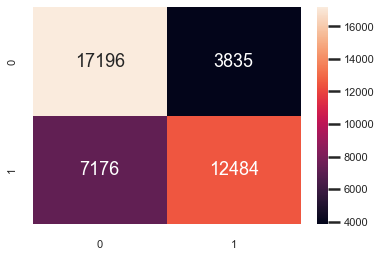

In [38]:
# Import classification metrics
from sklearn.metrics import confusion_matrix                                                        # confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # metrics

# Create model evaluation object
evaluation = ModelEvaluation(y_train)

# Predict target class based on training set
y_train_pred = dectree.predict(X_train)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

# Precision

Precision is a type of accuracy that attempts to display the proportions of positive identifications that are actually correct. Precision is useful in imbalanced classification problems where the majority class is negative. Precision is defined as:

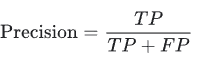

### Recall 
Recall attempts to display the proportions of actual positives that was identified correctly. A model with no false negatives will have a Recall of 1. Recall is defined as:

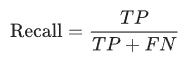

### F1-Score
F1-Score combines the Precision and Recall of a classification model into a single metric by taking their harmonic means. F1-Score is primarily used to compare between 2 classifiers. F1-Score is defined as follows:

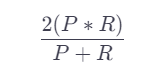

Where: P = Precison and R = Recall

We got an accuracy of 72.9% raw which is comparable to doctors but is still somewhat biased to the way the dataset was split.

S0 to combat this we decided to try Scikit-Learn’s K-fold cross-validation feature. To get a more accurate and less biased result by averaging out different train and test data.

The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. After that, it will return the average of predictions made on each test fold.

# 11.2 Cross Validation

Accuracy:	 0.7257870290727679
Precision:	 0.7508852691218131
Recall:		 0.6471515768056968
F1 score:	 0.6951699267839581
ROC AUC:	 0.7232239268651184


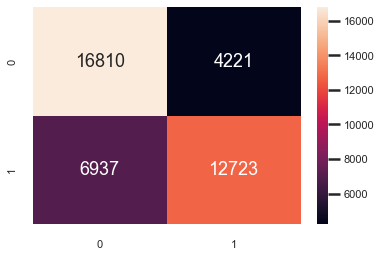

In [39]:
# Import cross-validation predictor
from sklearn.model_selection import cross_val_predict # model validation

# Use cross-validation to predict target class based on training set
y_train_pred = cross_val_predict(dectree, X_train, y_train.values.flatten(), cv=10)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

Now with a slightly lower accuracy of 72.5% the result is more realiable.

In [40]:
# The impact of each feature on the model
importances = list(zip(dectree.feature_importances_, X_train.columns))  # list of important features
importances.sort(reverse=True)                                          # sort the importances

# Print feature ranking
i = 1
for f in importances:                         # iterate over the list of important features
  print("{}. {} ({})".format(i, f[1], f[0]))  # print the ranking
  i += 1

1. ap_hi (0.7375232024142451)
2. age (0.1599673870328396)
3. cholesterol (0.07911504822288837)
4. ap_lo (0.01306408655542394)
5. gluc (0.01033027577460298)


Ap_hi variable looks to be the most dominant feature in this model, followed by the age.

Glucose level seems to be the weakest feature comparitively.

Another feature of Decision Trees is that we are able to plot the tree to see each node being classified.

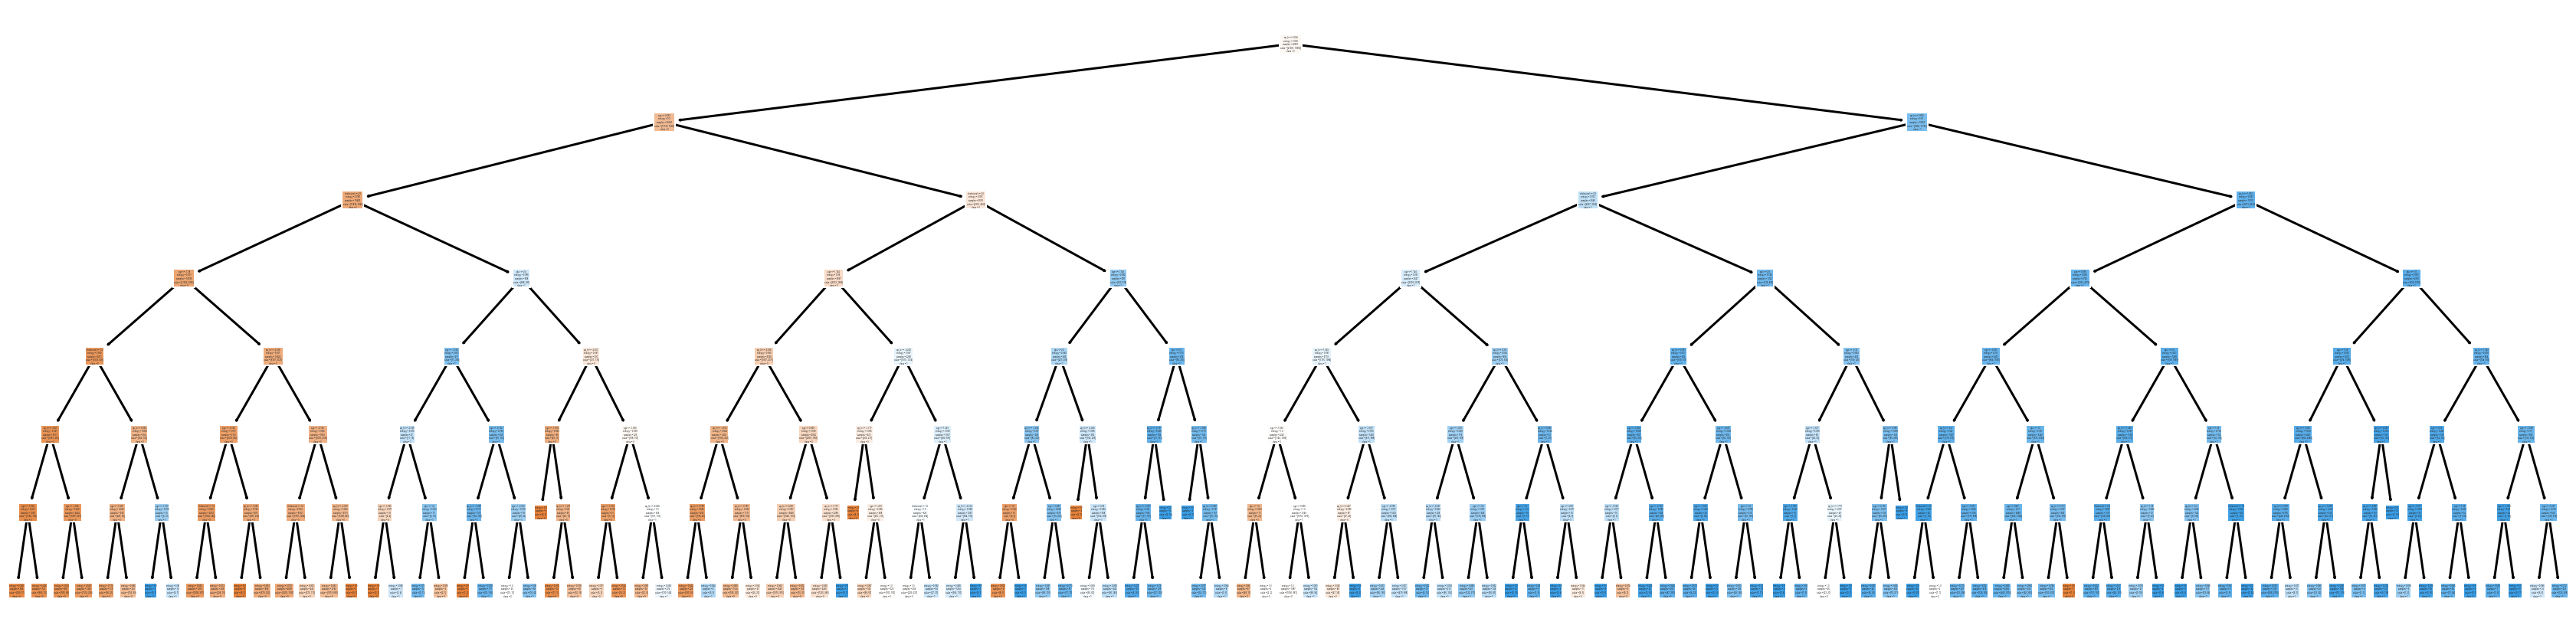

In [41]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize=(60,15))
out = plot_tree(dectree,
                feature_names=X_train.columns,
                class_names=[str(x) for x in dectree.classes_],
                filled=True)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(3)
        
plt.show()

# 11.3 Evaluate Test Data

Now to repeat what we did on the train set but now with the test set.

Accuracy:	 0.7206422018348624
Precision:	 0.7613423592107158
Recall:		 0.6218091989177744
F1 score:	 0.6845376845376845
ROC AUC:	 0.7182208540734975


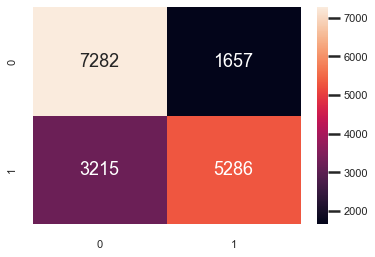

In [42]:
# Create model evaluation object
evaluation = ModelEvaluation(y_test)

# Predict target class based on test set
y_test_pred = dectree.predict(X_test)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_pred)

# 11.4 ROC Curve

The Receiver Operating Characteristic(ROC) curve graphs the performance of a classification model at all classification thresholds. Plotting 2 parameters, True Postive Rate against False Positive Rate.

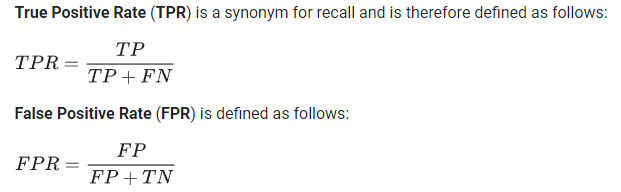

The Area Under the ROC Curve(AUC) provides an measure of performance across all possible classification thresholds. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. The AUC is desireable as an accuracy metric as it is scale-invariant and classification-threshold invariant. The AUC also reflects the classifier's ability to distinguish between positive and negative classes, making it a good metric for model evaluation.

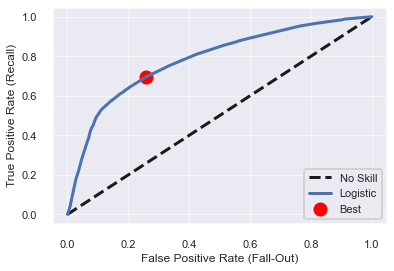

Best Threshold = 0.4470588235294118
G-Mean = 0.7183683905405546


In [43]:
# Import essential libraries
from sklearn.metrics import roc_curve # roc curve metric
from numpy import sqrt                # calculate square root
from numpy import argmax              # find max value

# Predict target class probabilities based on test set
y_test_probas = dectree.predict_proba(X_test)

# Plot Receiver Operating Characteristic (ROC) curve
evaluation.plot_roc_curve(y_test_probas)

Accuracy:	 0.7190366972477065
Precision:	 0.720514390691978
Recall:		 0.6920362310316434
F1 score:	 0.7059882395295811
ROC AUC:	 0.7183752024382963


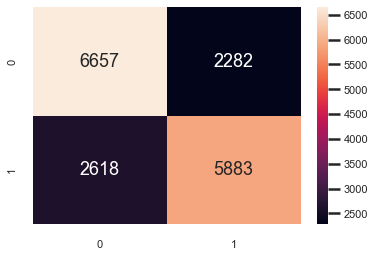

In [44]:
# Set threshold to best threshold
threshold = evaluation.best_threshold()

# Use new threshold value to make new prediction based on test set
y_test_newpred = [1 if y_test_probas[i][1] > threshold else 0 for i in range(len(y_test_probas))]

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_newpred)

Above are the final results for the test set via the use of Decision Tree Classifier, now to try another new model that we learnt.

# 12. Adaboost Classifier

AdaBoost or Adaptive Boosting is one of the ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996.

It combines multiple weak classifiers to increase the accuracy of classifiers.

AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.

The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.

Like previously with the decision tree we will be using GridSearch to find the best combination of hyper-parameters for an estimator and plot a Confusion Matrix afterwards to see the results.

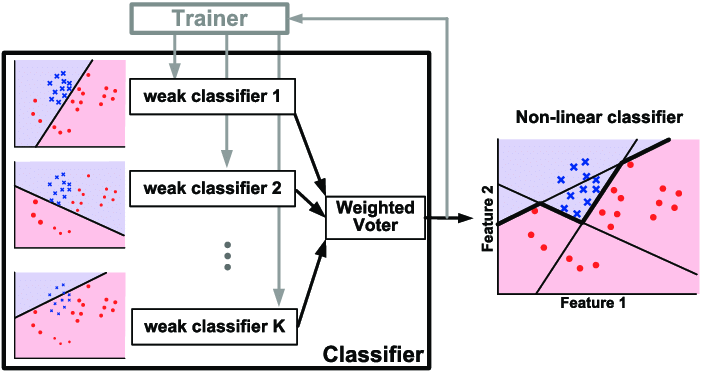

In [45]:
# Import classification model and hyper-parameter optimizer
from sklearn.model_selection import GridSearchCV  # optimizer
from sklearn.ensemble import AdaBoostClassifier   # model

# A dictionary contains hyper-parameters combinations that we want to examine
ada_param_grid = {
    'n_estimators': range(250, 500, 50),    # number of estimators
    'learning_rate': [0.1, 0.3, 1],         # learning rate
    'random_state': [40]                    # randomness of the estimator
}

# Setup grid search
search_ada = GridSearchCV(AdaBoostClassifier(),         # estimator
                          param_grid=ada_param_grid,    # grid of hyper-parameters
                          scoring='roc_auc',            # performance measurement
                          cv=10,                        # cross-validation strategy
                          verbose=3)

# Fit the training set on the model with combinations of hyper-parameters
search_ada.fit(X_train, y_train.values.flatten())

# The best hyper-parameters combination
search_ada.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.797 total time=   2.4s
[CV 2/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.786 total time=   2.4s
[CV 3/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.781 total time=   2.3s
[CV 4/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.794 total time=   2.3s
[CV 5/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.788 total time=   2.4s
[CV 6/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.786 total time=   2.4s
[CV 7/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.784 total time=   2.4s
[CV 8/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.778 total time=   2.4s
[CV 9/10] END learning_rate=0.1, n_estimators=250, random_state=40;, score=0.790 total time=   2.5s
[CV 10/10] END learning_rate=0.1, n_e

[CV 3/10] END learning_rate=0.3, n_estimators=400, random_state=40;, score=0.781 total time=   3.7s
[CV 4/10] END learning_rate=0.3, n_estimators=400, random_state=40;, score=0.794 total time=   3.9s
[CV 5/10] END learning_rate=0.3, n_estimators=400, random_state=40;, score=0.788 total time=   3.8s
[CV 6/10] END learning_rate=0.3, n_estimators=400, random_state=40;, score=0.786 total time=   4.0s
[CV 7/10] END learning_rate=0.3, n_estimators=400, random_state=40;, score=0.784 total time=   3.8s
[CV 8/10] END learning_rate=0.3, n_estimators=400, random_state=40;, score=0.779 total time=   3.8s
[CV 9/10] END learning_rate=0.3, n_estimators=400, random_state=40;, score=0.790 total time=   3.9s
[CV 10/10] END learning_rate=0.3, n_estimators=400, random_state=40;, score=0.791 total time=   3.9s
[CV 1/10] END learning_rate=0.3, n_estimators=450, random_state=40;, score=0.797 total time=   4.3s
[CV 2/10] END learning_rate=0.3, n_estimators=450, random_state=40;, score=0.786 total time=   4.4s

{'learning_rate': 0.1, 'n_estimators': 450, 'random_state': 40}

In [46]:
# Create model object with the best found hyper-parameters combination
adaboost = search_ada.best_estimator_

# Fit the training set on the model
adaboost.fit(X_train, y_train.values.flatten())

AdaBoostClassifier(learning_rate=0.1, n_estimators=450, random_state=40)

#### Now to create a model object using the best combination of hyper-parameters found and fit it on the training set. 

# 12.1 Confusion Matrix

Same process as with the decision tree model, 

Get results from train set -> cross validate -> test set -> get best threshold -> final results.

Accuracy:	 0.7233786340959918
Precision:	 0.7584573748308525
Recall:		 0.6272126144455747
F1 score:	 0.6866195222451139
ROC AUC:	 0.7202441275832078


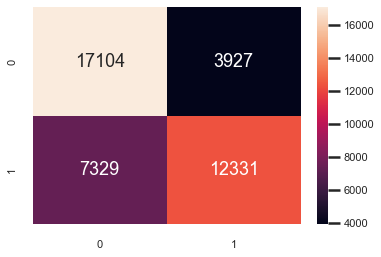

In [47]:
# Import classification metrics
from sklearn.metrics import confusion_matrix                                                        # confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # metrics

# Create model evaluation object
evaluation = ModelEvaluation(y_train)

# Predict target class based on training set
y_train_pred = adaboost.predict(X_train)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

# 12.2 Cross Validation

Accuracy:	 0.7224939175739107
Precision:	 0.7593602777089016
Recall:		 0.6230925737538149
F1 score:	 0.6845105051408136
ROC AUC:	 0.7192539565074528


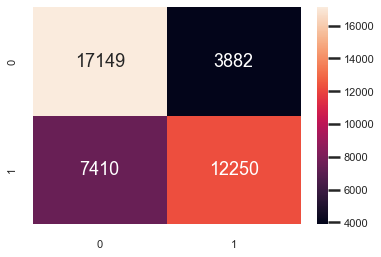

In [48]:
# Import cross-validation predictor
from sklearn.model_selection import cross_val_predict # model validation

# Use cross-validation to predict target class based on training set
y_train_pred = cross_val_predict(adaboost, X_train, y_train.values.flatten(), cv=10)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_train_pred)

In [49]:
# The impact of each feature on the model
importances = list(zip(adaboost.feature_importances_, X_train.columns))   # list of important features
importances.sort(reverse=True)                                       # sort the importances

# Print feature ranking
i = 1
for f in importances:                         # iterate over the list of important features
  print("{}. {} ({})".format(i, f[1], f[0]))  # print the ranking
  i += 1

1. age (0.5066666666666667)
2. ap_hi (0.20222222222222222)
3. ap_lo (0.11555555555555555)
4. cholesterol (0.10888888888888888)
5. gluc (0.06666666666666667)


From ADABoost, it seems that Age's importances has increased and has became a more dominant feature compared to Ap_hi which was the dominant feature in the Decision Tree model.

Glucose Level still remains to be the least dominant feature of the model still having the least impact on the results.

# 12.3 Evaluating Test Set

Accuracy:	 0.7192660550458716
Precision:	 0.7601385481310434
Recall:		 0.6195741677449712
F1 score:	 0.6826960466623462
ROC AUC:	 0.7168236651455587


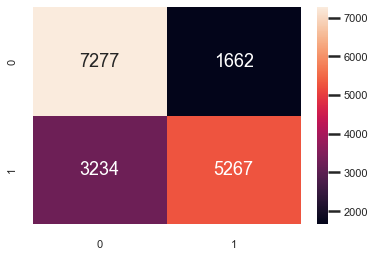

In [50]:
# Create model evaluation object
evaluation = ModelEvaluation(y_test)

# Predict target class based on test set
y_test_pred = adaboost.predict(X_test)

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_pred)

# 12.4 ROC Curve

The Receiver Operating Characteristic(ROC) curve graphs the performance of a classification model at all classification thresholds. Plotting 2 parameters, True Postive Rate against False Positive Rate.

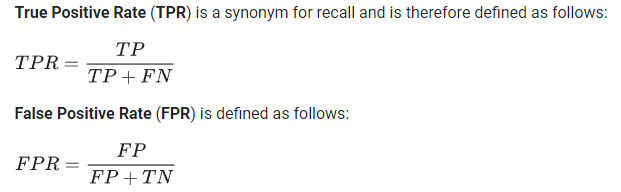

The Area Under the ROC Curve(AUC) provides an measure of performance across all possible classification thresholds. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. The AUC is desireable as an accuracy metric as it is scale-invariant and classification-threshold invariant. The AUC also reflects the classifier's ability to distinguish between positive and negative classes, making it a good metric for model evaluation.

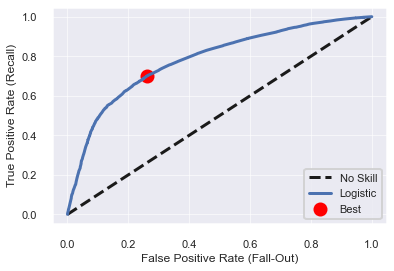

Best Threshold = 0.49759000765722966
G-Mean = 0.7192368023813991


In [51]:
# Import essential libraries
from sklearn.metrics import roc_curve # roc curve metric
from numpy import sqrt                # calculate square root
from numpy import argmax              # find max value

# Predict target class probabilities based on test set
y_test_probas = adaboost.predict_proba(X_test)

# Plot roc curve
evaluation.plot_roc_curve(y_test_probas)

Accuracy:	 0.7197821100917431
Precision:	 0.7178158148505304
Recall:		 0.7005058228443712
F1 score:	 0.7090551884265047
ROC AUC:	 0.7193098529145225


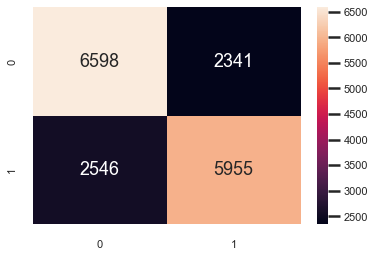

In [52]:
# Set threshold to best threshold
threshold = evaluation.best_threshold()

# Use new threshold value to make new prediction based on test set
y_test_newpred = [1 if y_test_probas[i][1] > threshold else 0 for i in range(len(y_test_probas))]

# Plot confusion matrix
evaluation.plot_confusion_matrix(y_test_newpred)

# 12.5 AdaBoost Conclusion 

So from using ADABoost we end up with a final accuracy score of 71.97% on the test set, which is almost equivalent to the final accuracy score of the Decision Tree model which had 71.90%. The other results are all also very similiar to that of the Decision Tree Model.

Here is some of the advantages and disadvantages of using ADABoost:

### Advantages:

Easy to implement.

Iteratively corrects the mistakes of weak classifiers and improves accuracy by combining weak learners

Able to use many base classifiers with Adaboost

Not prone to overfitting

### Disadvantages:

Sensitive to noise data.

Highly affected by outliers because it tries to fit each point perfectly.

Finally lets try out a another and the final Machine Learning model we learnt for this mini project.

### What I learnt:

AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones. This allows us to capture many different kinds of non-linear relationships, which translates into better prediction accuracy on any problems of interests. It is also easier to use with less need for tweaking parameters unlike algorithms like SVM.

### Reccomendations:

Boosting technique learns progressively, it is important to ensure that you have quality data. AdaBoost is also extremely sensitive to Noisy data and outliers so if you do plan to use AdaBoost then it is highly recommended to eliminate them.


# 13. Preparing Dataset for SVM 

Repeating this process but for SVM this time.

In [53]:
# For Support Vector Machine
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

# For accuracy analysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

# 13.1 Create Dummy Variables

For the purpose of machine learning, we want the categorical type features to be represented efficiently. Hence, using the get_dummies method, we convert cholesterol and gluc to 3 columns each, and concatenate them to our dataset, removing the original. The columns would indicate the level of cholesterol and glucose binarily, and act as 'switches' that turn the parameter on and off in a machine learning algorithm, allowing us to treat it statistically like a interval-level variable.

In [54]:
# Create dummy variables for non-binary categorical data
dummies = pd.get_dummies(cardio_data[['cholesterol','gluc']])
dummies.head(10)

,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,1,0,0,1,0,0
1,0,0,1,1,0,0
2,0,0,1,1,0,0
3,1,0,0,1,0,0
5,0,1,0,0,1,0
7,0,0,1,0,0,1
8,1,0,0,1,0,0
10,1,0,0,1,0,0
11,1,0,0,1,0,0
12,1,0,0,1,0,0


### We rename the different levels of cholesterol and gluc

Old Name	New Name	Meaning
1	n	Normal
2	an	Above Normal
3	wan	Well Above Normal


In [55]:
cardio_data = pd.concat([cardio_data,dummies],axis=1)
cardio_data.drop(['cholesterol','gluc'],axis=1,inplace=True)
cardio_data.rename(columns = {'cholesterol_1':'cholesterol_n','cholesterol_2':'cholesterol_an','cholesterol_3':'cholesterol_wan'}, inplace = True)
cardio_data.rename(columns = {'gluc_1':'gluc_n','gluc_2':'gluc_an','gluc_3':'gluc_wan'}, inplace = True)

In [56]:
cardio_data.sample(10)

,age,ap_hi,ap_lo,cardio,cholesterol_n,cholesterol_an,cholesterol_wan,gluc_n,gluc_an,gluc_wan
49270,-2.048154,0.279970,1.114511,1,1,0,0,1,0,0
47278,-0.266236,-0.429710,-0.202346,0,1,0,0,1,0,0
7391,1.070203,0.279970,-0.202346,0,1,0,0,1,0,0
15457,-2.048154,-0.429710,-0.202346,0,1,0,0,1,0,0
36078,0.921710,-1.139391,-1.519202,0,1,0,0,1,0,0
64546,0.921710,0.279970,-0.202346,0,1,0,0,1,0,0
38638,1.218696,-0.429710,-1.519202,1,1,0,0,0,1,0
5192,0.476230,2.409013,1.114511,1,0,1,0,0,1,0
64792,0.476230,-0.429710,-0.202346,1,1,0,0,1,0,0
44808,-0.860209,0.989651,2.431367,1,0,1,0,0,1,0


# 13.2 Feature Scaling

For the numerical datatypes in our dataset, the range of values of the features varies widely due to thier units (eg. Age in years, Bp in mmHg). This can affect algorithms that utilizes Euclidean distance, as the feature with the the largest range of values will have a more significant impact. We want to normalize or scale the data such that each feature contributes proportionately to the calculation.

There are 2 widely used methods of feature scaling. The first being Normalization, which maps the feature values to into a [0,1] interval.

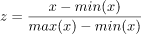

The second is Standardization which shifts the values of all features to a 0 mean, and maps them into a range where they have a standard deviation of 1.




In [57]:
to_be_scaled_feat = ['age', 'ap_hi', 'ap_lo']
scaler=StandardScaler()
scaler.fit(cardio_data[to_be_scaled_feat])
cardio_data[to_be_scaled_feat] = scaler.transform(cardio_data[to_be_scaled_feat])

In [58]:
cardio_data.sample(10)

,age,ap_hi,ap_lo,cardio,cholesterol_n,cholesterol_an,cholesterol_wan,gluc_n,gluc_an,gluc_wan
59777,-0.563222,0.989651,-1.519202,1,1,0,0,1,0,0
53355,0.624723,-1.139391,-0.202346,1,0,0,1,0,0,1
19454,-0.860209,0.279970,-0.202346,1,0,1,0,1,0,0
15388,0.030751,0.989651,1.114511,1,0,1,0,1,0,0
25076,0.624723,0.279970,1.114511,0,1,0,0,1,0,0
11206,0.773217,-0.429710,-0.202346,0,1,0,0,1,0,0
18003,0.624723,0.989651,-1.519202,1,0,0,1,1,0,0
15753,0.624723,-0.429710,-0.202346,1,1,0,0,1,0,0
47618,0.179244,0.279970,-0.202346,1,0,1,0,1,0,0
32499,0.179244,-1.139391,-0.202346,0,1,0,0,1,0,0


# 13.3 Split Dataset into Training Set and Test Set
We first extract the test variable cardio from the dataset, we then split the remaining features into a training set and test set before doing the same for the test variable column.

In [59]:
target_name = 'cardio'
data_target = cardio_data[target_name] #Extract cardio column as target variable
data = cardio_data.drop([target_name], axis=1) #Drop cardio column from rest of data

We will do a 70-30 split. Split 30% test, remaining 70% train. Xtrain and Xtest will act as our training data, while Ytrain and Ytest will act as our test set

In [60]:
Xtrain, Ytrain, Xtest, Ytest = train_test_split(data, data_target, test_size=0.3, random_state=0)

From the training set, we extract 30% as a validation set. In the context of SVM, we will be using the validation set to aid in determining our hyperparameter. Extract 30% from training set as validation set. (Zval, Zvaltest) Remainder (Ztrain, Ztest) will act as our training set

In [61]:
Ztrain, Zval, Ztest, Zvaltest = train_test_split(Xtrain, Xtest, test_size=0.3, random_state=0)

In [62]:
print(Ztrain.shape)
print(Zval.shape)

(28483, 9)
(12208, 9)


In [63]:
np.array(Zval).var()

0.5047154599726894

# 14. Support Vector Machines

In machine learning, support vector machines, SVMs are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. 

In our problem, the presence of CVDs is classified as a binary categorical variable. Hence, SVM can be used as a classification model to predict the target variable based on provided features.

SVM works by projecting each sample onto a point in an N-dimensional space(N being the number of features), and determining a hyperplane which seperates and classifies the points based on the target variable. Once a hyperplane is determined, it acts as a decision boundary that can classify unknown datapoints based on its position in space relative to the hyperplane.

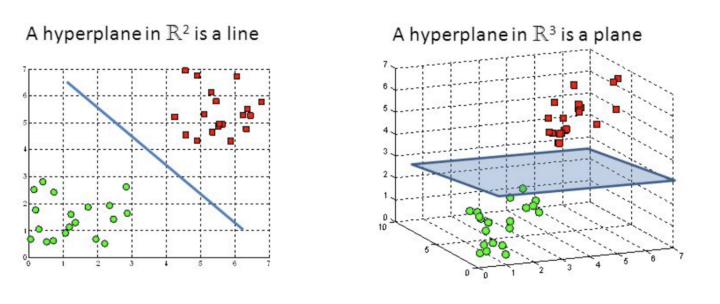

### Kernel Trick
Most datasets in the real world cannot be easily seperated by hyperplane as they are non-linear. A workaround for this is to apply a tranformation, a Kernel, to the non-linear data to project it into a higher dimensional space making it easier for a hyperplane to classify the data. This workaround is referred to as the **Kernel Trick**.

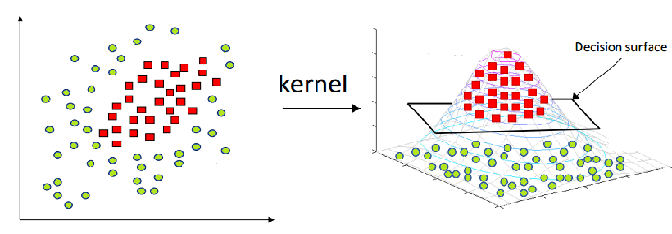

### Types of kernel
**Linear Kernel** - The Linear Kernel, also called the 'Non-kernel', is the simplest form of kernels as it does not project the data into higher dimensional space. It is typically used for datasets that can be seperated linearly and contains a large amount of features, as increasing dimensionality on these data does not necessarily increase seperability. The Linear Kernel is expressed as:



**Polynomial Kernel** - The Polynomial Kernel projects the data to a higher dimensional space, depending on its chosen parameter: **Degree(D)**. This allows for the fitting of a hyperplane on non-linearly seperable data. The parameter D has to be carefully chosen as a large value can lead to overfitting. The Polynomial kernel is expressed as: 



**Radial Basis Function** - Most commonly used kernel in SVM, and the most generalized form of kernelization. RBF involves finding Support Vector Classifiers in infinite dimensions, using the Taylor-Series expansion of its exponent. The Radial Kernel function behaves like a Weighted Nearest Neighbour model, using the closest observations, by Euclidean Distance, to  determine the classification of a new observation. The RBF kernel is expressed as: 

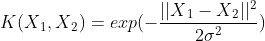

The Radial Basis Function also has its own parameter **Gamma**, which controls the distance of influence of a single point.
Low values of Gamma results in points further apart being grouped together while for high values of Gamma, points need to be close together to be considered of the same group. Generally a lower Gamma value results in greater accuracy 

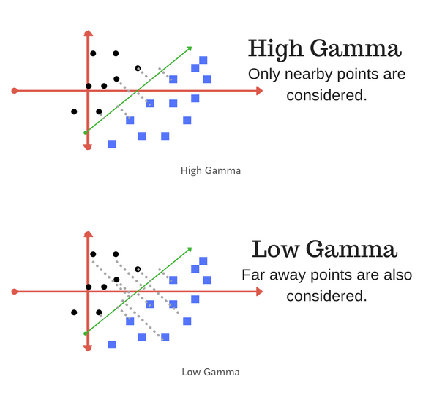

**Sigmoid Kernel**- This function is equivalent to a two-layer, perceptron model of the neural network, which is used as an activation function for artificial neurons. The kernel is expressed as:

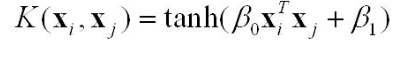



### C - Parameter
The Cost parameter in SVM, also known as a C-Parameter, is a hyperparameter which determines the soft-margin of the hyperplane. Real data are often noisy and not well defined at their boundary. Attempting to fit a hyperplane at such a boundary would result in either an overfit model or in certain cases, the hyperplane cannot be defined. A soft-margin containing purposefully misclassified points on either side of a hyperplane would allow for a better or more linear fit. The C-parameter adds a penalty for each misclassified data point. A smaller C results in a larger margin, while a larger C would mean a smaller margin with less misclassified data.

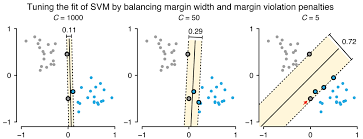

# 14.2 Training SVM Models

We first do a general assessment of the various kernels at both extremities of the C parameter. We leave the Kernel specific hyperparameters as default as it the kernel type and C-Parameters that has the most significant impact on accuracy. Doing this will help us determine which kernel types and what range of C-Parameter we should conduct our gridsearch in, which would significantly reduce the computational cost of our hyperparameter tuning. We also conduct this assessment on our validation set which contains lesser samples to further reduce computational cost.

In [64]:
svc = SVC(kernel='linear',C=100, cache_size=1999)
svc.fit(Zval, Zvaltest)

pred = svc.predict(Ytrain)

print('Model accuracy score with kernel=linear c=100 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, pred)))

Model accuracy score with kernel=linear c=100 hyperparameters: 0.7182


In [65]:
svc = SVC(kernel='linear', C=0.1, cache_size=1999)
svc.fit(Zval, Zvaltest)

pred = svc.predict(Ytrain)

print('Model accuracy score with kernel=linear c=0.1 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, pred)))

Model accuracy score with kernel=linear c=0.1 hyperparameters: 0.7185


In [66]:
svc = SVC(kernel='rbf',C=100, cache_size=1999)
svc.fit(Zval, Zvaltest)

pred = svc.predict(Ytrain)

print('Model accuracy score with kernel=rbf c=100 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, pred)))

Model accuracy score with kernel=rbf c=100 hyperparameters: 0.7234


In [67]:
svc = SVC(kernel='rbf',C=0.1, cache_size=1999)
svc.fit(Zval, Zvaltest)

pred = svc.predict(Ytrain)

print('Model accuracy score with kernel=rbf c=0.1 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, pred)))

Model accuracy score with kernel=rbf c=0.1 hyperparameters: 0.7233


In [68]:
svc = SVC(kernel='poly',C=100, cache_size=1999)
svc.fit(Zval, Zvaltest)

pred = svc.predict(Ytrain)

print('Model accuracy score with kernel=polynomial c=100 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, pred)))

Model accuracy score with kernel=polynomial c=100 hyperparameters: 0.7213


In [69]:
svc = SVC(kernel='poly',C=0.1, cache_size=1999)
svc.fit(Zval, Zvaltest)

pred = svc.predict(Ytrain)

print('Model accuracy score with kernel=polynomial c=0.1 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, pred)))

Model accuracy score with kernel=polynomial c=0.1 hyperparameters: 0.7234


In [70]:
svc = SVC(kernel='sigmoid',C=100, cache_size=1999)
svc.fit(Zval, Zvaltest)

pred = svc.predict(Ytrain)

print('Model accuracy score with kernel=sigmoid c=100 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, pred)))

Model accuracy score with kernel=sigmoid c=100 hyperparameters: 0.6177


In [71]:
svc = SVC(kernel='sigmoid',C=0.1, cache_size=1999)
svc.fit(Zval, Zvaltest)

pred = svc.predict(Ytrain)

print('Model accuracy score with kernel=sigmoid c=0.1 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, pred)))

Model accuracy score with kernel=sigmoid c=0.1 hyperparameters: 0.5960


From these results, we determine that the RBF and Polynomial Kernel at a lower value C, provides the best accuracy.

# 14.2 Improve accuracy by Hyperparameter tuning

## Optimal Hyperparameter via gridsearch
We will now determine a more optimal set of Hyperparameters for accuracy, using grid search. Grid search is a brute force method for hyperparameter tuning in the ScikitLearn library. It conducts a exaustive search for every specified hyperparameter value to determine the most optimal parameters. Grid search also utilizes cross-validation, which further divides the dataset to multiple smaller train an test sets, to net a better representation of the accuracy of specific parameter combinations.

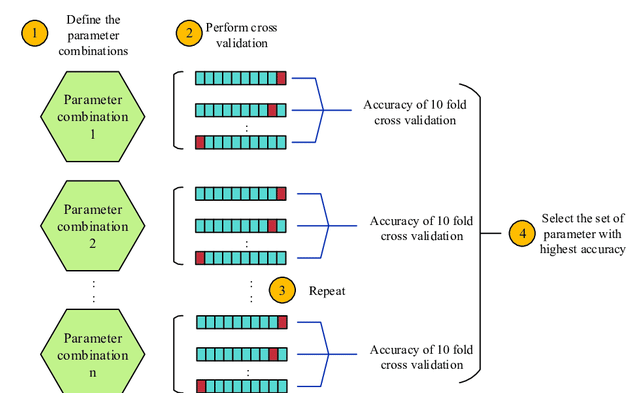



We initiate a grid search on the RBF and Poly Kernels, with a C-parameter range of [0.1, 0.5, 1, 5, 10], as we've determined that a lower C value nets a higher accuracy from our general assessment. We also choose the degree parameter for the Poly kernel as [2,4,6,8]. The Gamma parameter for the RBF kernel at default for sklearn's SVM is defined as:

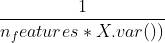

Which for our Zval validation set results in a Gamma value of 0.22, an extremely low value. Hence we tune our Gamma value at a low range.

In [72]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc = SVC()
# declare parameters for hyperparameter tuning
parameters = [ {'C':[0.1, 0.5, 1, 5, 10], 'kernel':['rbf'], 'gamma':[0.1,0.22015,0.4,0.8], 'cache_size':[1000]},
               {'C':[0.1, 0.5, 1, 5, 10], 'kernel':['poly'], 'degree': [2,4,6,8], 'cache_size':[1000]} 
             ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4,
                           verbose=3,
                           n_jobs=-3)

grid_search.fit(Zval, Zvaltest)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-3,
             param_grid=[{'C': [0.1, 0.5, 1, 5, 10], 'cache_size': [1000],
                          'gamma': [0.1, 0.22015, 0.4, 0.8],
                          'kernel': ['rbf']},
                         {'C': [0.1, 0.5, 1, 5, 10], 'cache_size': [1000],
                          'degree': [2, 4, 6, 8], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [73]:
# examine the best model on validation set


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7265


Parameters that give the best results : 

 {'C': 10, 'cache_size': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, cache_size=1000, gamma=0.1)


We have established out optimal parameter from our first grid search. Now we narrow down our specified parameter values to determine a more accurate set of optimal hyperparameters and we conduct the search on our main training set.

In [74]:
svc = SVC()

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 3, 5, 8, 10, 12], 'gamma':[0.05, 0.1, 0.15, 0.22], 'kernel':['rbf'], 'cache_size':[1000]}]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4,
                           verbose=3,
                           n_jobs=-3)

grid_search.fit(Ztrain, Ztest)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-3,
             param_grid=[{'C': [1, 3, 5, 8, 10, 12], 'cache_size': [1000],
                          'gamma': [0.05, 0.1, 0.15, 0.22],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=3)

In [75]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

GridSearch CV best score : 0.7250


Parameters that give the best results : 

 {'C': 3, 'cache_size': 1000, 'gamma': 0.22, 'kernel': 'rbf'}


In [76]:
svc = SVC(kernel='rbf', C=3, gamma=0.22, cache_size=1999)
svc.fit(Ztrain, Ztest)

bestpred = svc.predict(Ytrain)

print('Model accuracy score with kernel=rbf c=3 gamma=0.22 hyperparameters: {0:0.4f}'.
      format(accuracy_score(Ytest, bestpred)))

Model accuracy score with kernel=rbf c=3 gamma=0.22 hyperparameters: 0.7268


We achieved an accuracy of 72.68%, but it is not a good enough indicator of our model performance, as default accuracy can be misleading due to accuracy paradox and imbalanced class distribution. To gain a better insight on model performace, we look into other forms of accuracy determination.

# 14.3 Accuracy and Performance analysis

## Confusion Matrix
A Confusion Matrix generates a list of expected values and a list of predictions from our machine learning model and returns the result as an array. Each column represents the instances in an actual class, while each role represents the instances in our predicted class.

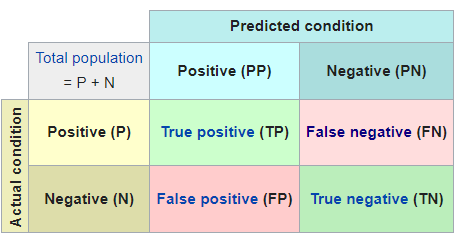

Calculating a confusion matrix can help us understand what our model gets right what what errors it makes. The values from a confusion matrix is also used to calculate different types of accuracies.



<AxesSubplot:>

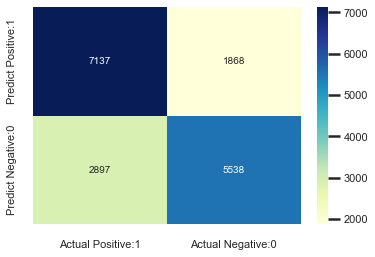

In [77]:
cm = confusion_matrix(Ytest, bestpred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [78]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) Type 1 Error(Actual Negative, Predicted Positive) = ', cm[0,1])

print('\nFalse Negatives(FN) Type 2 Error(Actual Positive, Predicted Negative) = ', cm[1,0])


True Positives(TP) =  7137

True Negatives(TN) =  5538

False Positives(FP) Type 1 Error(Actual Negative, Predicted Positive) =  1868

False Negatives(FN) Type 2 Error(Actual Positive, Predicted Negative) =  2897


In [79]:
print(classification_report(Ytest, bestpred, digits=4))

              precision    recall  f1-score   support

           0     0.7113    0.7926    0.7497      9005
           1     0.7478    0.6566    0.6992      8435

    accuracy                         0.7268     17440
   macro avg     0.7295    0.7246    0.7245     17440
weighted avg     0.7289    0.7268    0.7253     17440



### Precision

Precision is a type of accuracy that attempts to display the proportions of positive identifications that are actually correct. Precision is useful in imbalanced classification problems where the majority class is negative. Precision is defined as:

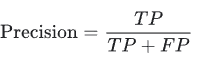

### Recall 
Recall attempts to display the proportions of actual positives that was identified correctly. A model with no false negatives will have a Recall of 1. Recall is defined as:

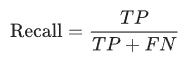

### F1-Score
F1-Score combines the Precision and Recall of a classification model into a single metric by taking their harmonic means. F1-Score is primarily used to compare between 2 classifiers. F1-Score is defined as follows:

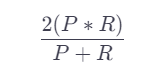

Where: P = Precison and R = Recall

# 14.4 ROC Curve

The Receiver Operating Characteristic(ROC) curve graphs the performance of a classification model at all classification thresholds. Plotting 2 parameters, True Postive Rate against False Positive Rate.

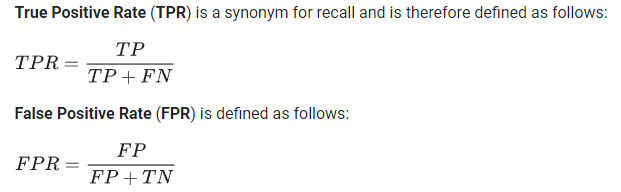

The Area Under the ROC Curve(AUC) provides an measure of performance across all possible classification thresholds. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. The AUC is desireable as an accuracy metric as it is scale-invariant and classification-threshold invariant. The AUC also reflects the classifier's ability to distinguish between positive and negative classes, making it a good metric for model evaluation.

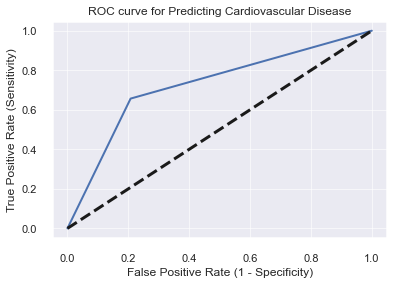

In [80]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Ytest, bestpred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Cardiovascular Disease')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [81]:
#compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(Ytest, bestpred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7246


Our model achieved an AUC score of 0.7246, which makes it acceptable at discriminating between classes. To put it into context, an AUC score of 0.5 would mean that the model is no better than random guessing, while an AUC of 1 would mean that the model is perfect at predicting classes.

# 14.5 SVM Conclusion
Using SVM, we have created a non-probablistic binary classification model that has an ROC AUC accuracy of 72.46% and 72.68% recall. The advantages and disadvantages of using SVM are listed as follows:   

### Advantages
Efficient in high dimensional space

Handles non-linear data using Kernel Trick

Low risk of overfitting (Regularization by C)

### Disadvantages
Long training time on large datasets

Hard to visualize and interpret

No probablistic clarification for result

### What I've Learnt
SVM is a great classification and regression model that can be adjusted to suit most datasets, and its adaptability to large amount of features is a plus. The flexibility in tuning of hyperparameters also allows for a highly accurate model, customized for a specific use. However, the training complexity for SVM being O(n^2) or O(n^3) means that its computational cost scales exponentially with the amount of data provided, making it unsuitable for large datasets.

### Recommendation
To make SVM viable with larger datasets and reduce computation time, GPU accelerated SVMs (such as ThunderSVM or Nvidia Rapids) can be a viable alternative. For Jupyter notebook, adjustments to cache size, dedicated RAM and for methods which allow for parallel computing using multiple cores (n_jobs parameter for GridSearchCV) can also reduce computation time.

# 15. General Conclusion
When it comes to determining the viablility of a model for a classification predictive problem, the context in which the model is used for is a major factor. For most medical settings, an AUC of 0.95 or above would be preferred as the cost of being wrong is too high. For the same reason, a high Recall is preferrable too, due to the fact that Recall in our context refers to the rate of false negatives,which is the misdiagnosis of a positive case as a negative. For our problem, a model with an AUC of around 0.72 would be unsuitable to act as a medical diagnosing tool for CVDs. However, due to the simplicity of the features involved, it could act as an unofficial indicator instead.

A machine learning algorithm only considers the features included in the provided dataset. Which means it will not take into account potential symptoms and medical history that is not part of the features provided, unlike a real doctor. Hence a classification model cannot fully replace the diagnosis of a medical professional.

Given the choice between Decision Tree, AdaBoost and SVM, despite SVM boasting the highest accuracy, it will likely be unsuited for use as a medical diagnostic tool due to the large and ever increasing amount of data that real medical datasets would portray. Therefore, AdaBoost seems to be the best choice out of the three.  

### Potential Improvements
To make our classification models better, the features provided could be improved with more invasive and concrete indicators of potential CVDs such as EKGs, Cardiograms and Blood tests results. A more in-depth tuning of hyperparameters could also help with improving accuracy.

# 16. References
- https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
- https://ninkatec.com/cardiovascular-diseases-among-elderly-in-singapore/#:~:text=According%20to%20statistics%20by%20Singapore%20Heart%20Foundation%2C%20almost,risks%20for%20cardiovascular%20disease%20increases%20markedly%20with%20age.
- https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)
- https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465#:~:text=In%20severe%20cases%2C%20low%20blood%20pressure%20can%20be,number%20%28diastolic%29%20is%20generally%20considered%20low%20blood%20pressure.
- https://oureverydaylife.com/l-lysine-for-hair-growth-12249188.html
- https://www.cprcertified.com/blog/making-sense-of-blood-pressure-readings
- https://plotly.com/python/line-and-scatter/
-https://www.cancer.org/healthy/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html#:~:text=BMI%20is%20used%20to%20broadly%20define%20different%20weight,18.5%20Normal%20weight%3A%20BMI%20is%2018.5%20to%2024.9
-https://www.mygreatlearning.com/blog/adaboost-algorithm/
-https://data-flair.training/blogs/adaboost-algorithm/
